##Elektrotehnički fakultet Sarajevo

###Vjerovatnoća i statistika

# **DIABETES PREDICTION**

Tim je radio zajedno na svim zadacima.

## Biblioteke i set podataka

In [ ]:
! pip install researchpy

In [ ]:
import io
import pandas
import matplotlib.pyplot as plot
import seaborn
import numpy
import array as arr
import statistics
from tabulate import tabulate
import plotly.express as px
import pylab
import scipy.stats as stats
from scipy.stats import kstest
from scipy.stats import shapiro
from statsmodels.stats.proportion import proportion_confint
from sklearn.linear_model import LinearRegression
from itertools import combinations
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
import researchpy as rp

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving diabetes_prediction_dataset.csv to diabetes_prediction_dataset (1).csv


In [ ]:
dataframe = pandas.read_csv(io.BytesIO(uploaded['diabetes_prediction_dataset.csv']))

In [ ]:
print("Izgled seta podataka (broj pojedinačnih instanci i varijabli): ")
dataframe.shape

Izgled seta podataka (broj pojedinačnih instanci i varijabli): 


(100000, 9)

# Deskriptivna statistika i vizualizacija distribucije varijabli

## **Fizički aspekt**

Za početak ćemo posmatrati odnose fizičkih karakteristika sa prisustvom dijabetesa kod pacijenata. U ovom setu podataka oni su dati sa starošću, BMI-om i spolom. Ispod vidimo kratak opis relevantnih numeričkih varijabli:

In [ ]:
dataframe.describe()[["bmi", "age"]]

,bmi,age
count,100000.000000,100000.000000
mean,27.320767,41.885856
std,6.636783,22.516840
min,10.010000,0.080000
25%,23.630000,24.000000
50%,27.320000,43.000000
75%,29.580000,60.000000
max,95.690000,80.000000


### Part 1.1

U ovome dijelu analize ćemo razmatrati uticaj dobi pojedinca na faktore koje utiču na kontrakciju dijabetesa toga pojedinca. Intuitivno, sa porastom godina pojedinca raste podložnost dobijanju dijabetesa, što ćemo u nastavku istražiti.

Na početku ćemo istražiti samu distribuciju godina učesnika u našem setu podataka da bi mogli zaključiti eventualnu pristrasnost ka starijim ili mlađim pojedincima.


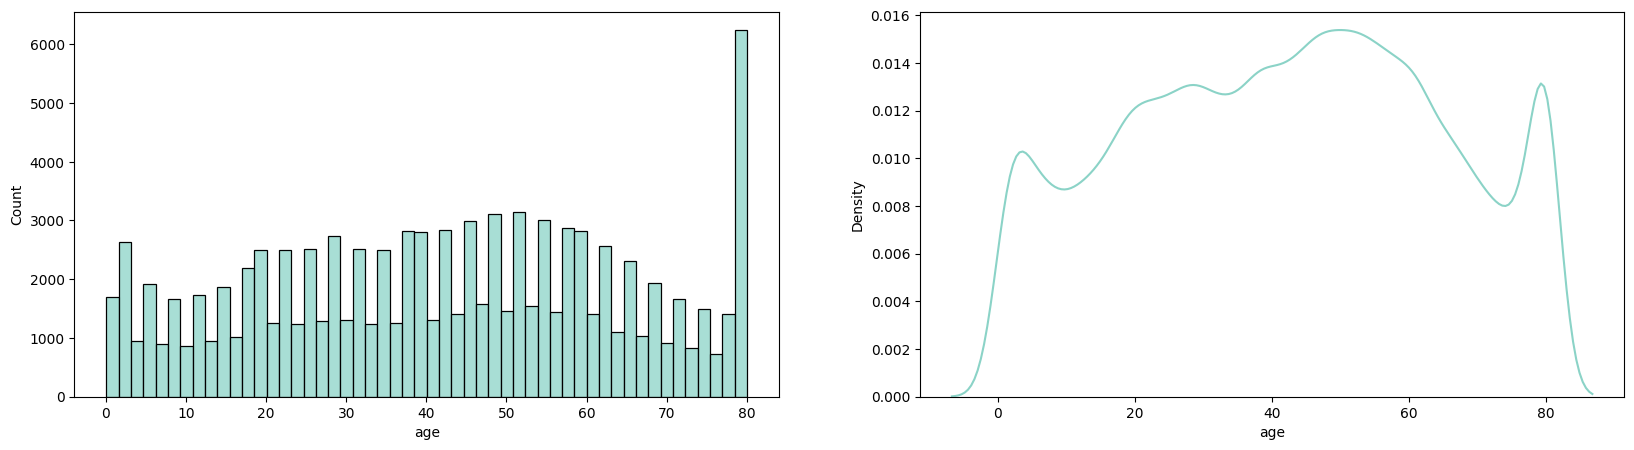

In [ ]:
#age dist
f, axes = plot.subplots(1, 2, figsize = (20, 5))
seaborn.histplot(dataframe["age"], x = dataframe["age"], color = '#8bd3c7', ax=axes[0])
seaborn.kdeplot(x = dataframe["age"], color = '#8bd3c7', ax=axes[1])
plot.show()

Kao što vidimo sa histograma imamo poprilično neravnomjernu distribuciju učesnika analize. Naime, ako bi kao referencu uzeli piramidu godina stanovnište neke industrijalizovane države, vidjeli da ona približno prati normalnu distribuciju, gdje je najviše stanovnika srednje životne dobi. U našem uzorku čini se da imamo približno uniformnu distribuciju što u svakom slučaju ne odgovara piramidi doba stanovništva. Također, se ističe nesrazmjeran broj učesnika u kasnoj starosti od 75-80 godina, što može značajno uticati na rezultate studije.

Sada ćemo pogledati distribuciju našeg uzorka pomoću histograma. Također ćemo i pogledati distrubuciju dijabetičara i nedijabetičara u odnosu na njihovu dob i vidjeti kakav uticaj dob ima na kontrakciju dijabetesa pojedinca.

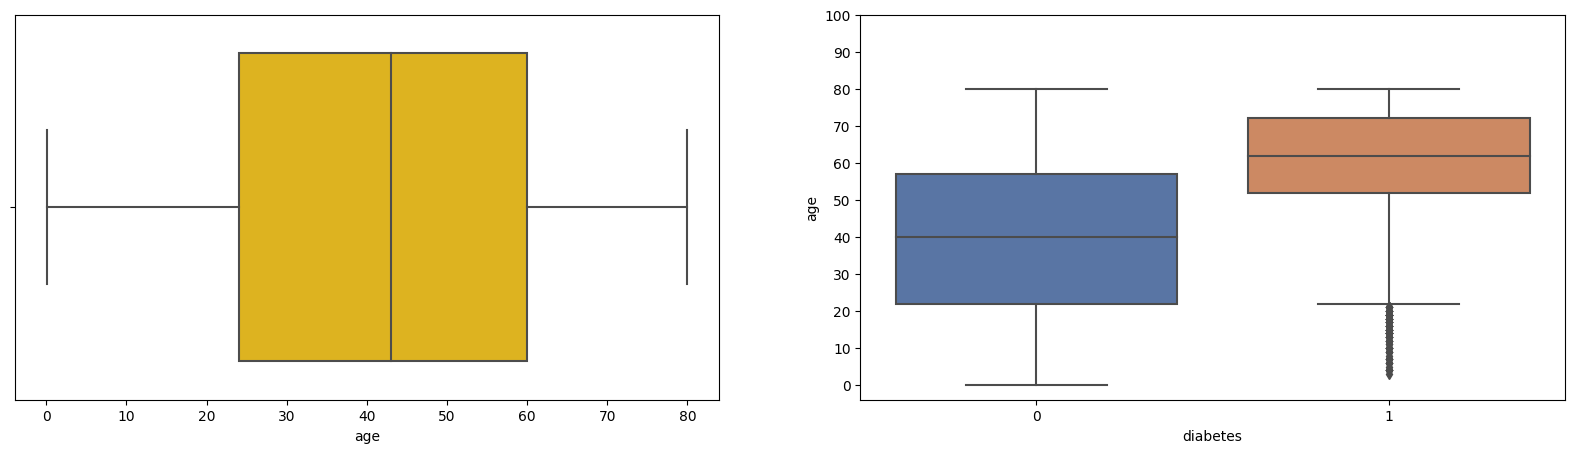

+-----+-----------+----------------------+
|     |   Medijan |   Srednja vrijednost |
+=====+===========+======================+
| all |        43 |              41.8859 |
+-----+-----------+----------------------+
| neg |        40 |              40.1152 |
+-----+-----------+----------------------+
| pos |        62 |              60.9466 |
+-----+-----------+----------------------+


In [ ]:
diabetes = dataframe['diabetes']
age_all = dataframe['age']
age_pos = arr.array('f')
age_neg = arr.array('f')

for i in range(len(diabetes)) :
  if diabetes[i] == 1 : age_pos.append(age_all[i])
  else : age_neg.append(age_all[i])

f, axes = plot.subplots(1, 2, figsize = (20, 5))
ax2 = seaborn.boxplot(x = dataframe['age'], color = '#fdc500', ax = axes[0])
ax2.set_xlabel('age')
seaborn.boxplot(x = diabetes, y = age_all, palette = "deep", ax=axes[1])
ticks = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
plot.yticks(ticks)
plot.show()

median_all = statistics.median(age_all)
mean_all = statistics.mean(age_all)
median_m = statistics.median(age_neg)
mean_m = statistics.mean(age_neg)
median_f = statistics.median(age_pos)
mean_f = statistics.mean(age_pos)

table = [[' ', 'Medijan', 'Srednja vrijednost'], ['all', median_all, mean_all], ['neg', median_m, mean_m], ['pos', median_f, mean_f]]
print(tabulate(table, headers = 'firstrow', tablefmt = 'grid'))
plot.show()

Kao što vidimo dijabetičari u našem uzorku su, u prosjeku, znatno stariji od nedijabetičara, što smo mogli i intuitivno zaključiti. U svrhu konsolidacije zaključaka vezanih za našu populaciju, pogledat ćemo i histrogram godina dijabetičara i nedijabetičara.

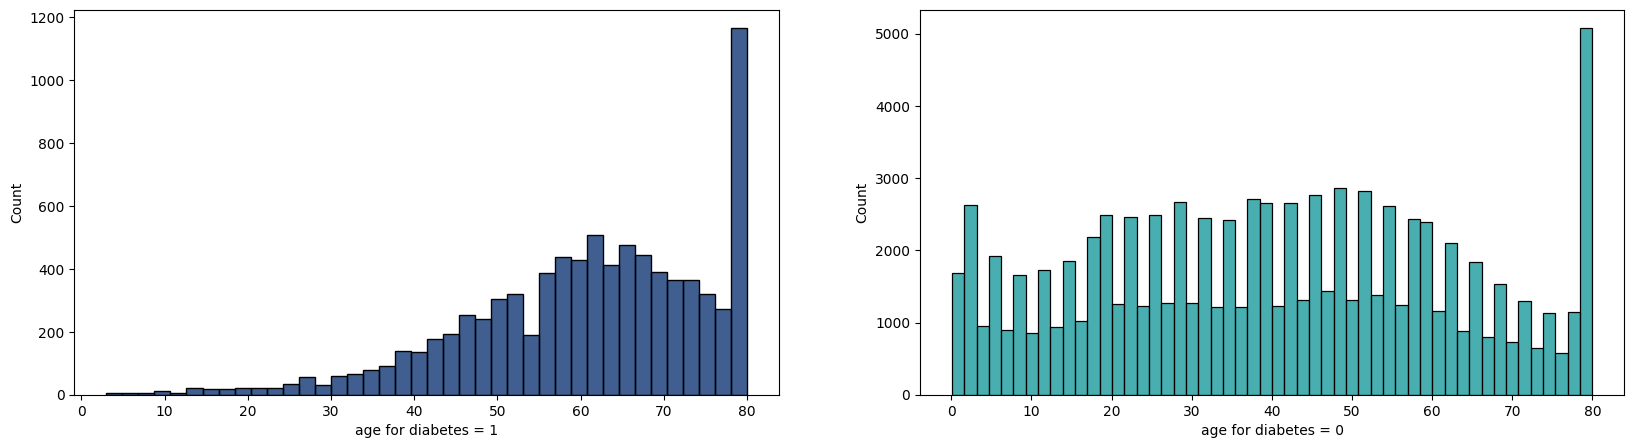

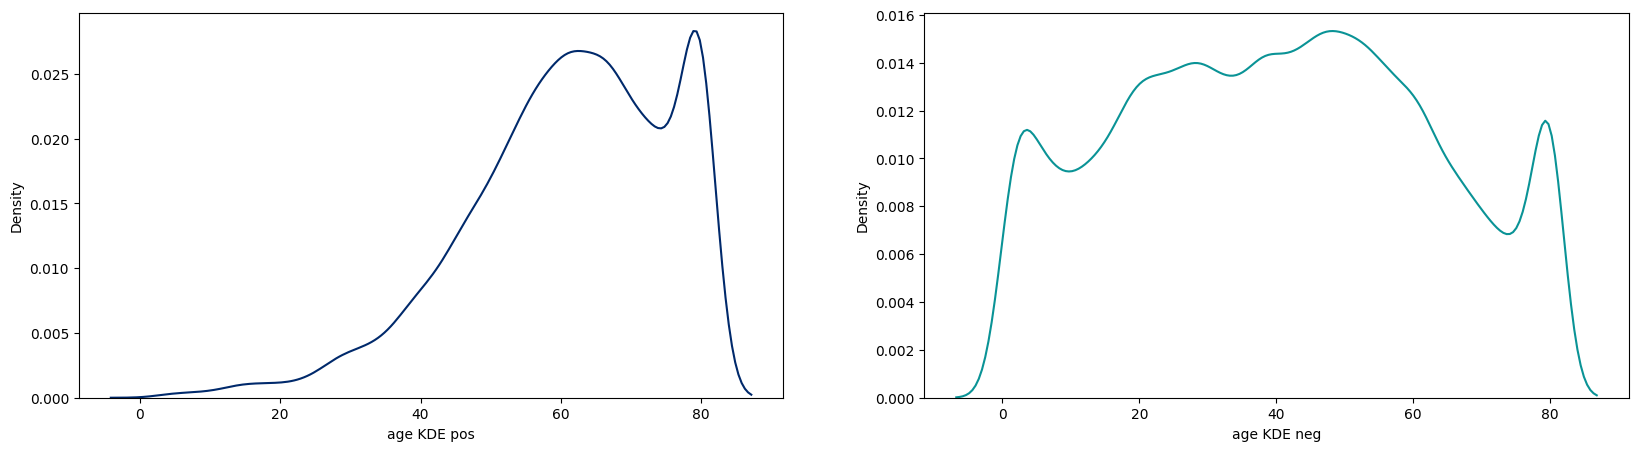

In [ ]:
diabetes = dataframe['diabetes']
age_all = dataframe['age']
age_pos = arr.array('f')
age_neg = arr.array('f')

for i in range(len(diabetes)) :
  if diabetes[i] == 1 : age_pos.append(age_all[i])
  else : age_neg.append(age_all[i])

f, axes = plot.subplots(1, 2, figsize = (20, 5))
ax1 = seaborn.histplot(x = age_pos, color = '#00296b', ax = axes[0])
ax1.set_xlabel('age for diabetes = 1')
ax2 = seaborn.histplot(x = age_neg, color = '#0a9396', ax = axes[1])
ax2.set_xlabel('age for diabetes = 0')
plot.show()

f, axes = plot.subplots(1, 2, figsize = (20, 5))
ax3 = seaborn.kdeplot(x = age_pos, color = '#00296b', ax = axes[0])
ax3.set_xlabel('age KDE pos')
ax4 = seaborn.kdeplot(x = age_neg, color = '#0a9396', ax = axes[1])
ax4.set_xlabel('age KDE neg')
plot.show()

Kao i na boxplotu, histogram potvrđuje da su dijabetičari u našem uzorku u prosjeku stariji. Interesantno je primjetiti da, za razliku od čitave populacije i nedijabetičara, distribucija dijabetičara aproksimativno prati normalnu distribuciju iskrivljenu ka desno, što znači da je veoma mali broj mlađih osoba sa dijabetesom u našem uzorku.

### Part 1.2

Ostalo nam je još da se osvrnemo na spol i BMI. Pogledajmo prvo raspodjelu BMI-a:

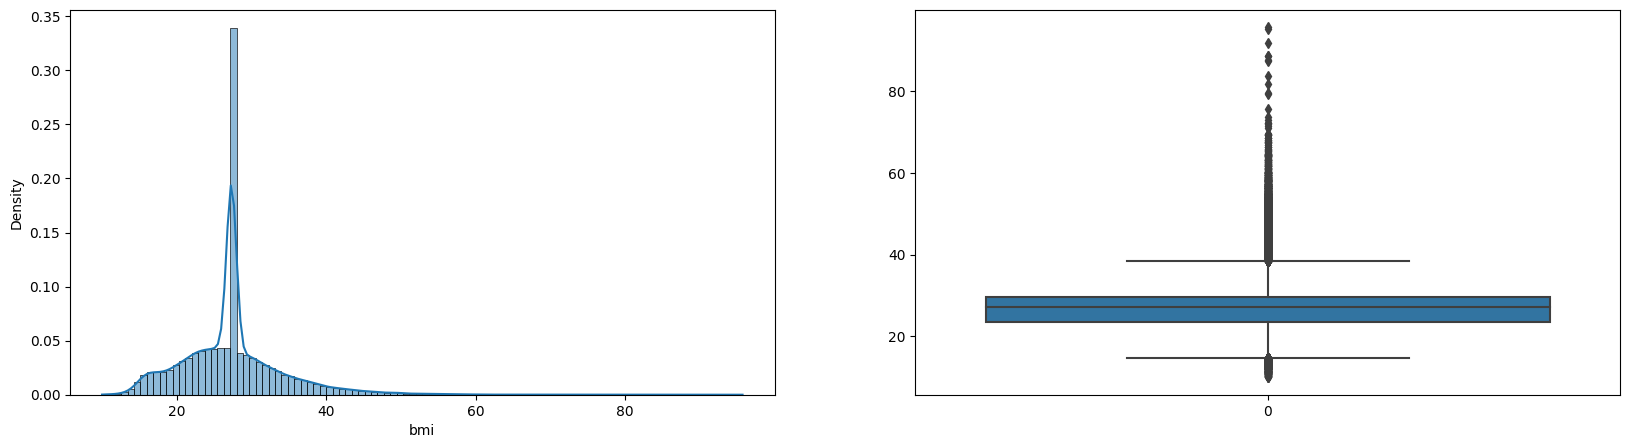


Moda za BMI: 27.32


In [ ]:
#BMI dist
fig, ax = plot.subplots(1, 2, figsize=(20, 5))

seaborn.histplot(ax=ax[0], data=dataframe["bmi"], kde=True, stat="density", bins=100)
seaborn.boxplot(ax=ax[1], data=dataframe["bmi"])

plot.show()

print("\nModa za BMI: {}".format(dataframe['bmi'].mode().iat[0]))

Vidimo da raspodjela BMI podsjeća na normalnu raspodjelu, sa izuzetkom u sredini gdje iz nekog razloga, broj jedne vrijednosti daleko odskače, a vidimo i da je ta vrijednost 27,3. Također sa boxplota vidimo veliki broj outliera iznad 1,5*IQR, tako da ćemo, radi preglednosti plotova u nastavku, njih zanemariti.

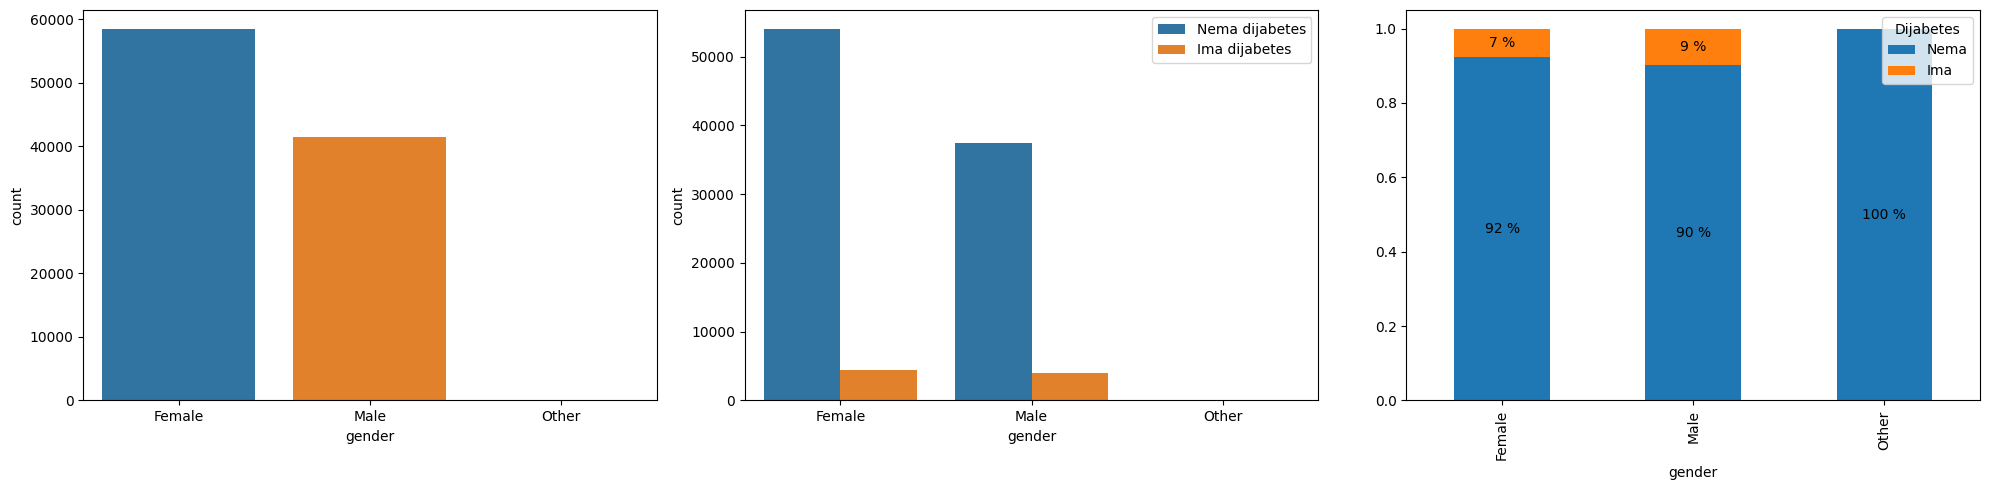

In [ ]:
fig, ax = plot.subplots(1, 3, figsize=(20, 5))

seaborn.countplot(ax=ax[0], data=dataframe, x="gender")
seaborn.countplot(ax=ax[1], data=dataframe, x="gender", hue="diabetes").legend(["Nema dijabetes","Ima dijabetes"])

df_grouped = dataframe.groupby("gender")["diabetes"].value_counts(normalize=True).unstack("diabetes")
df_grouped.plot.bar(ax=ax[2], stacked=True)
for i, red in df_grouped.reset_index(drop=True).iterrows():
    sum = 0
    for element in red:
        if element > 0.0001:
            plot.text(
                i,
                sum + element / 2,
                f"{int(element * 100)} %",
                va="center",
                ha="center",
            )
        sum += element
plot.tight_layout()
plot.legend(["Nema", "Ima"], title="Dijabetes")

plot.show()

Iz gore priloženih grafova vidimo da je broj žena u uzorku nešto veći. Također vidimo da je udio oboljelih od dijabetesa kod oba spola poprilično jednak, gdje je kod muškaraca ipak neznatan broj oboljelih više.

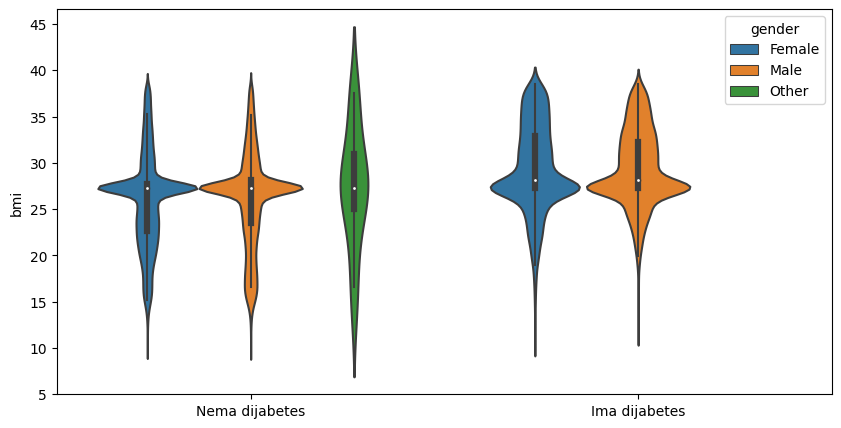

In [ ]:
#BMI i gender
# Koristimo violinplot, boxplot samo sa distribucijom, kao rečeno, računamo i filtriramo outliere
fig, ax = plot.subplots(1, 1, figsize=(10, 5))
q1 = dataframe["bmi"].quantile(0.25)
q3 = dataframe["bmi"].quantile(0.75)
iqr = q3 - q1
donja = q1 - iqr*1.5
gornja = q3 + iqr*1.5
legenda = {0 : "Nema dijabetes", 1: "Ima dijabetes"}
seaborn.violinplot(ax=ax, data=dataframe.replace({"diabetes" : legenda}).rename(columns={"diabetes" : ''}), x='', y = dataframe[dataframe["bmi"]<gornja]["bmi"], hue='gender')
plot.show()

U grafu poredimo BMI kod osoba sa dijabetesom i bez. Vidimo da postoji određena zavisnost visokog BMI-a sa prisustvom dijabetesa kod pacijenata. Pogledajmo još zajedničku zavisnost BMI i godina sa dijabetesom.

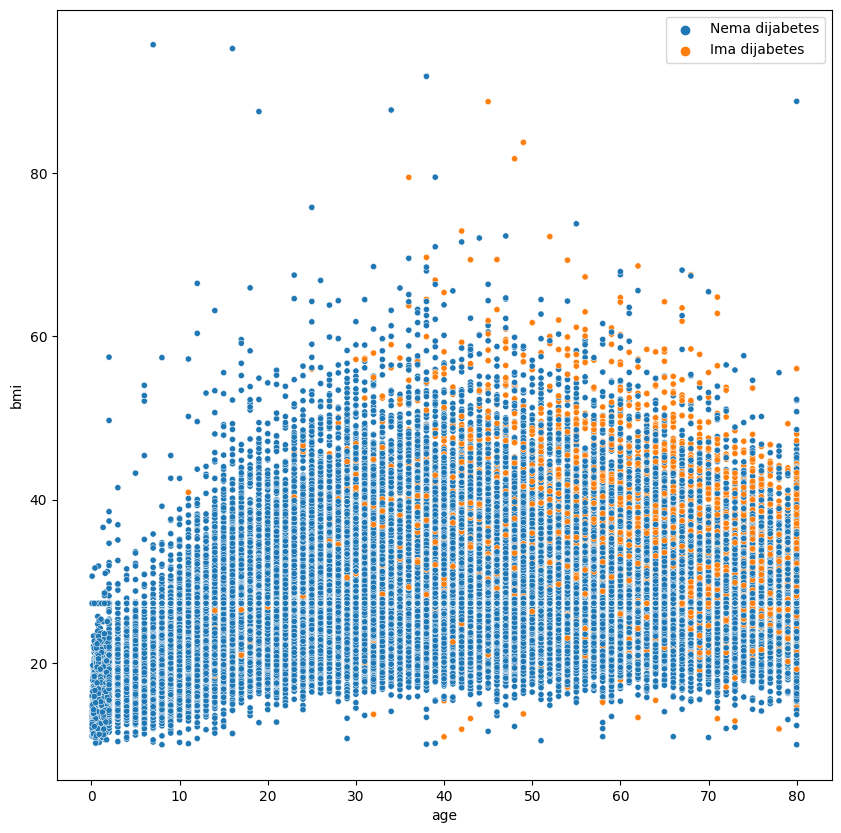

In [ ]:
fig, ax = plot.subplots(1, 1, figsize=(10, 10))
seaborn.scatterplot(ax=ax, data=dataframe.replace({"diabetes" : legenda}).rename(columns={"diabetes" : ''}), x="age", y="bmi", hue='', s=20)
plot.show()

Iz zadnjeg grafa vidimo da je moguće da ipak kombinacija visokog BMI-a sa visokom starošću utiče na razvoj dijabetesa.

## **Hemijski aspekt**

### Part 2.1

In [ ]:
diabetes = dataframe['diabetes']
hypertension = dataframe['hypertension']
heart_disease = dataframe['heart_disease']
smoking = dataframe['smoking_history']

**Šta je "starije" - hipertenzija i srčane bolesti ili dijabetes?**


Krv s povišenim udjelom glukoze izaziva oštećenja svih dijelova tijela, pa tako i krvnih sudova i bubrega - organa koji imaju ključnu ulogu u održavanju normalnog krvnog pritiska i prevenciji srčanih bolesti.

S tim u vezi, u nastavku ćemo ispitati utjecaj dijabetesa na hipertenziju i srčane bolesti.

**Distribucija: dijabetes | hipertenzija | srčane bolesti**

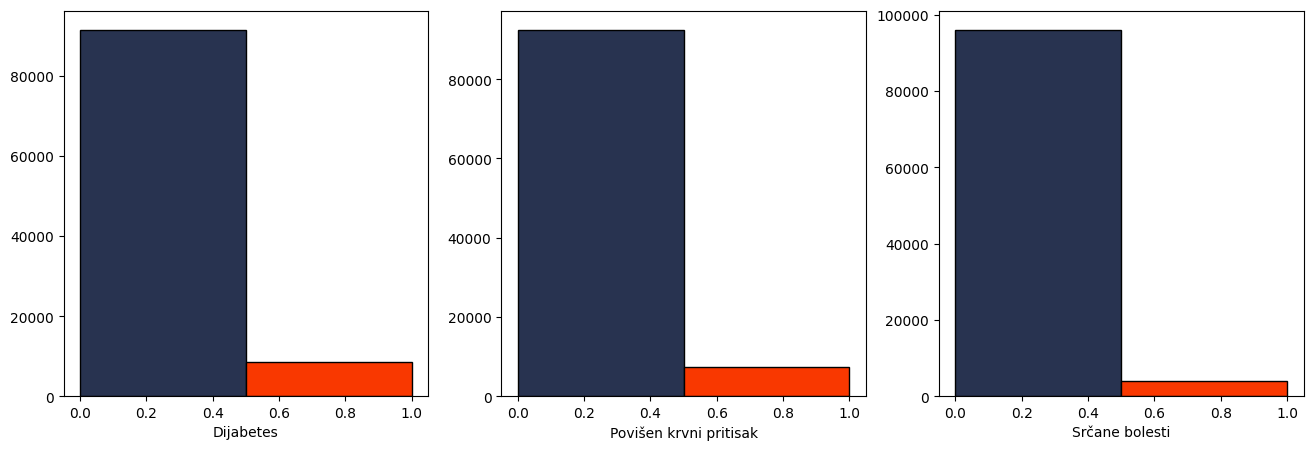

In [ ]:
figure, axes = plot.subplots(1, 3, figsize = (16, 5))

#diabetes
diabetes_plot = seaborn.histplot(diabetes, bins = 2, ax = axes[0])
diabetes_plot.patches[0].set_facecolor('#283350')
diabetes_plot.patches[1].set_facecolor('#f93800')
diabetes_plot.set_xlabel('Dijabetes')
diabetes_plot.set_ylabel('')

#hypertension
hypertension_plot = seaborn.histplot(hypertension, bins = 2, ax = axes[1])
hypertension_plot.patches[0].set_facecolor('#283350')
hypertension_plot.patches[1].set_facecolor('#f93800')
hypertension_plot.set_xlabel('Povišen krvni pritisak')
hypertension_plot.set_ylabel('')

#heart_disease
heart_disease_plot = seaborn.histplot(heart_disease, bins = 2, ax = axes[2])
heart_disease_plot.patches[0].set_facecolor('#283350')
heart_disease_plot.patches[1].set_facecolor('#f93800')
heart_disease_plot.set_xlabel('Srčane bolesti')
heart_disease_plot.set_ylabel('')

plot.show()

Iako posmatramo navedene zdravstvene mane, ne treba nas iznenaditi relativno mala prisutnost istih. U obzir treba uzeti da je prikaz zasnovan na čitavoj populaciji, tj. svim dobnim skupinama, neovisno od spola i fizičkog zdravlja (s obzirom da je to predmet diskusije ovog dijela ispitivanja).

Ispitajmo sada tezu iz uvoda i prikažimo hipertenziju u ovisnosti od prisustva dijabetesa.

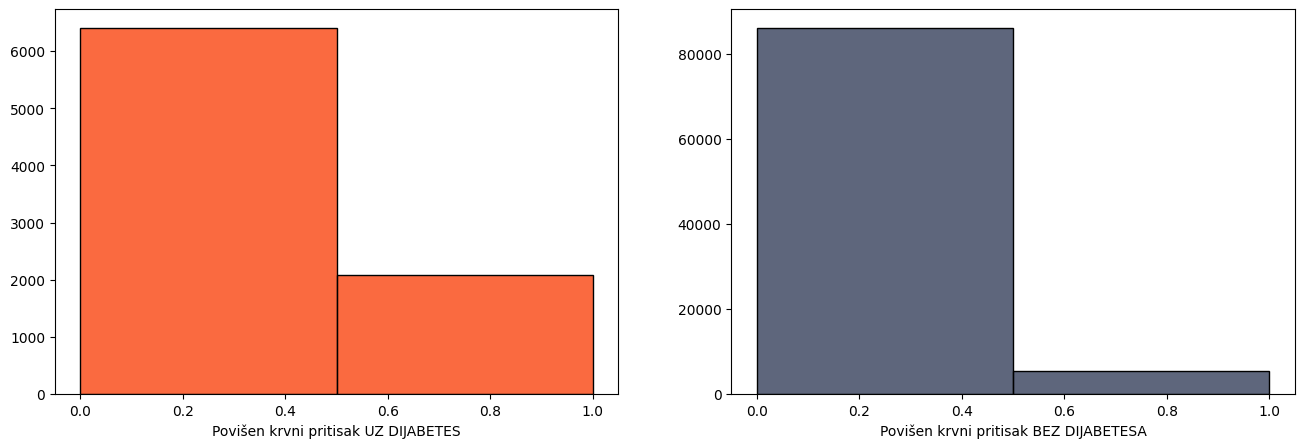

In [ ]:
figure, axes = plot.subplots(1, 2, figsize = (16, 5))

hypertension_with_diabetes = arr.array('f')
hypertension_without_diabetes = arr.array('f')

for i in range(len(diabetes)) :
  if diabetes[i] == 1 : hypertension_with_diabetes.append(hypertension[i])
  else : hypertension_without_diabetes.append(hypertension[i])

h_with_d = seaborn.histplot(hypertension_with_diabetes, ax = axes[0], bins = 2, color = '#f93800')
h_with_d.set_xlabel('Povišen krvni pritisak UZ DIJABETES')
h_with_d.set_ylabel('')

h_without_d = seaborn.histplot(hypertension_without_diabetes, ax = axes[1], bins = 2, color = '#283350')
h_without_d.set_xlabel('Povišen krvni pritisak BEZ DIJABETESA')
h_without_d.set_ylabel('')

plot.show()

Isti postupak ćemo provesti i za srčane bolesti...

Lijevi stupci predstavljaju odsustvo, a desni prisustvo hipertenzije/srčanih bolesti.

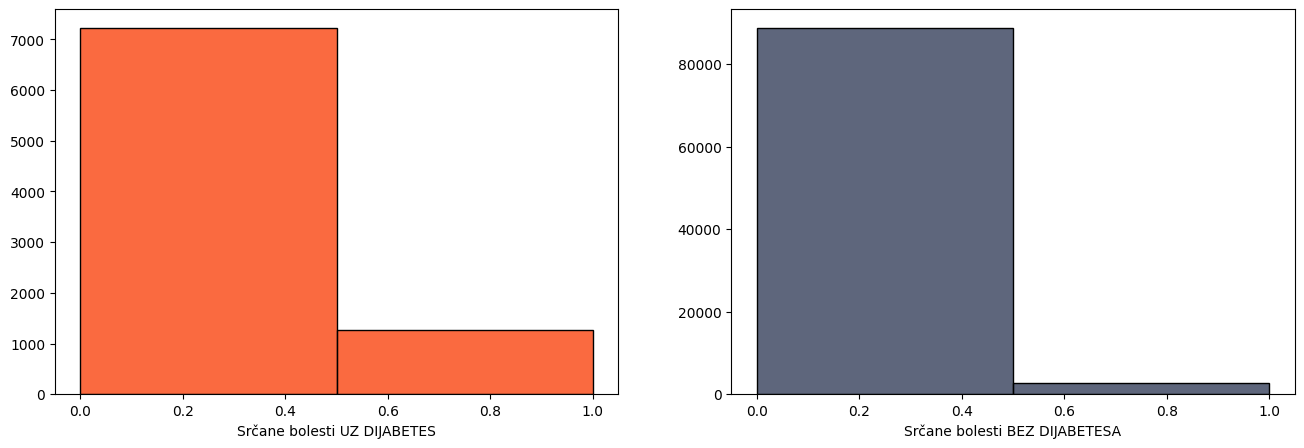

In [ ]:
figure, axes = plot.subplots(1, 2, figsize = (16, 5))

heart_disease_with_diabetes = arr.array('f')
heart_disease_without_diabetes = arr.array('f')

for i in range(len(diabetes)) :
  if diabetes[i] == 1 : heart_disease_with_diabetes.append(heart_disease[i])
  else : heart_disease_without_diabetes.append(heart_disease[i])

h_with_d = seaborn.histplot(heart_disease_with_diabetes, ax = axes[0], bins = 2, color = '#f93800')
h_with_d.set_xlabel('Srčane bolesti UZ DIJABETES')
h_with_d.set_ylabel('')

h_without_d = seaborn.histplot(heart_disease_without_diabetes, ax = axes[1], bins = 2, color = '#283350')
h_without_d.set_xlabel('Srčane bolesti BEZ DIJABETESA')
h_without_d.set_ylabel('')

plot.show()

S obzirom da primjećujemo sličnu raspodjelu kod hipertenzije i srčanih bolesti, možemo izvesti zajednički zaključak.

Na osnovu izloženog, bitno je istaći da prisustvo dijabetesa ne znači nužno pojavu hipertenzije ili srčanih bolesti (što vidimo na osnovu crvenog histograma). Ipak, jasno je da je njihov udio značajno veći uz prisustvo dijabetesa (što vidimo upoređujući desne stupce crvenog i plavog histograma).

Time smo pokazali da su osobe sa dijabetesom sklonije pojavi povišenog krvnog pritiska i razvoju srčanih bolesti.

U nastavku ćemo ispitati povezanost između dijabetesa i pušenja.

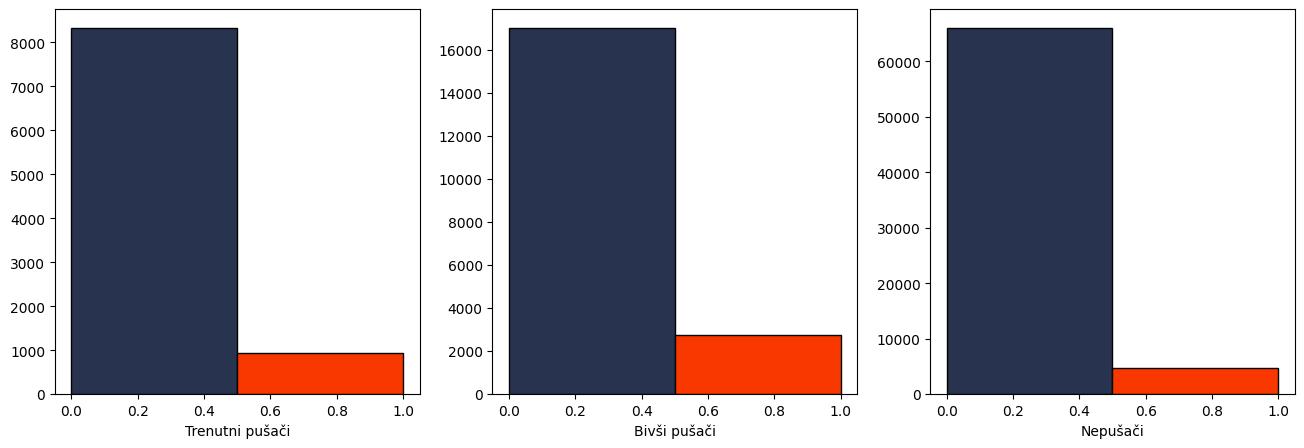

In [ ]:
figure, axes = plot.subplots(1, 3, figsize = (16, 5))

current_smoker = arr.array('f')
past_smoker = arr.array('f')
non_smoker = arr.array('f')

for i in range(len(smoking)) :
  if smoking[i] == "current" : current_smoker.append(diabetes[i])
  elif smoking[i] == "former" or smoking[i] == "not current" or smoking[i] == "ever" : past_smoker.append(diabetes[i])
  elif smoking[i] == "never" or smoking[i] == "No Info" : non_smoker.append(diabetes[i])

current_smoker_plot = seaborn.histplot(current_smoker, ax = axes[0], bins = 2)
current_smoker_plot.patches[0].set_facecolor('#283350')
current_smoker_plot.patches[1].set_facecolor('#f93800')
current_smoker_plot.set_xlabel('Trenutni pušači')
current_smoker_plot.set_ylabel('')

past_smoker_plot = seaborn.histplot(past_smoker, ax = axes[1], bins = 2)
past_smoker_plot.patches[0].set_facecolor('#283350')
past_smoker_plot.patches[1].set_facecolor('#f93800')
past_smoker_plot.set_xlabel('Bivši pušači')
past_smoker_plot.set_ylabel('')

non_smoker_plot = seaborn.histplot(non_smoker, ax = axes[2], bins = 2)
non_smoker_plot.patches[0].set_facecolor('#283350')
non_smoker_plot.patches[1].set_facecolor('#f93800')
non_smoker_plot.set_xlabel('Nepušači')
non_smoker_plot.set_ylabel('')

plot.show()

S obzirom na pomalo zbunjujuću kategorizaciju varijable *smoking_history*, historiju pušenja smo jednostavno podijelili na trenutne i bivše, te nepušače (na osnovu diskusije u vezi ove varijable u komentarima *dataset*-a, a što je slučaj i sa ostalim obradama istog).

U skladu s očekivanjima, zastupljenost dijabetesa kod nepušača je najmanja. Podaci ukazuju da je kod bivših pušača prisutnost dijabetesa najveća, a prate ih trenutni pušači.

### Part 2.2

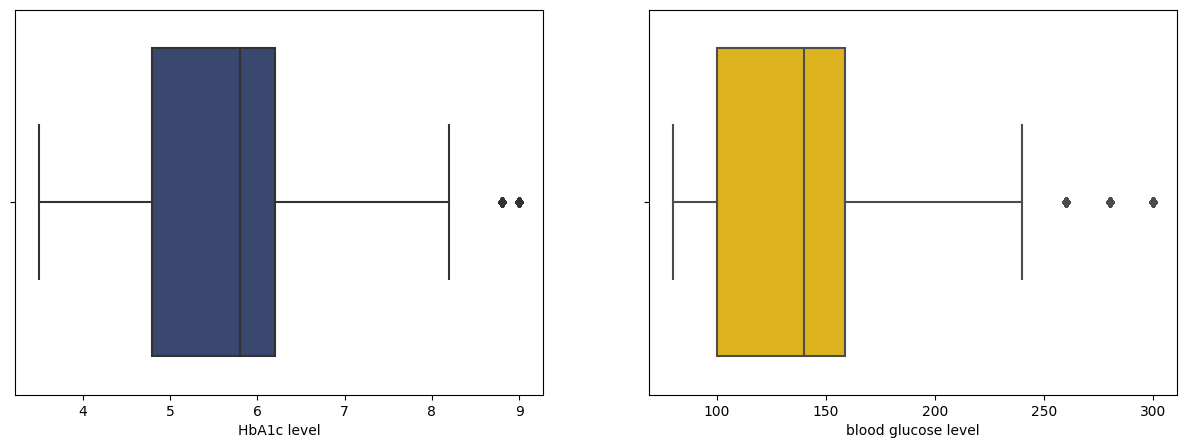

In [ ]:
f, axes = plot.subplots(1, 2, figsize = (15, 5))
ax1 = seaborn.boxplot(x = dataframe['HbA1c_level'], color = '#324376', ax = axes[0])
ax1.set_xlabel('HbA1c level')
ax2 = seaborn.boxplot(x = dataframe['blood_glucose_level'], color = '#fdc500', ax = axes[1])
ax2.set_xlabel('blood glucose level')
plot.show()

HbA1c i nivo šećera (glukoze) u krvi su neki od glavnih indikatora dijabetesa. U našem dataset-u su to varijable HbA1c_level i blood_glucose_level.

HbA1c (hemoglobin A1c) test je analiza krvi pri kojoj se mjeri prosječan nivo šećera u krvi tokom protekla 3 mjeseca. Jedan je od često korištenih dijagnostičkih alata za dijagnozu predijabetesa i dijabetesa. Mjeri postotak crvenih krvnih zrnaca na koje je zakačen šećer (što je izraženije kod osoba sa višim nivoom šećera u krvi, koji se kači na hemoglobin eritrocita). Normalan nivo je ispod 5.7%. 5.7% - 6.4% je indikator predijabetesa, a 6.5% indikator dijabetesa.

In [ ]:
print("Medijan: ", statistics.median(dataframe['HbA1c_level']))
print("Srednja vrijednost: ", statistics.mean(dataframe['HbA1c_level']))
print("Min: ", min(dataframe['HbA1c_level']))
print("Max: ", max(dataframe['HbA1c_level']))
q1, q3 = numpy.percentile(dataframe['HbA1c_level'], [25, 75]);
print("Q1: ", q1, ", Q3: ", q3)

Medijan:  5.8
Srednja vrijednost:  5.527507
Min:  3.5
Max:  9.0
Q1:  4.8 , Q3:  6.2


Sa grafika uočavamo da ova varijabla nema pravilnu raspodjelu. No, većina vrijednosti je skoncentrisana oko medijana (5.8), što je prilično blizu 5.7 - granice između normalnog nivoa HbA1c i indikacijskih vrijednosti za predijabetes. Također, računski dobijamo da je postotak onih koji prelaze tu granicu veći od 50%:

In [ ]:
count = len([i for i in dataframe['HbA1c_level'] if i >= 5.7])
print("Udio instanci sa HbA1c >= 5.7 u uzorku (u %): ", count/1000)

Udio instanci sa HbA1c >= 5.7 u uzorku (u %):  62.143


Varijabla blood_glucose_level pokazuje nivo šećera u krvi u trenutku mjerenja. Pritom je riječ o običnoj analizi krvi, za razliku od onih za koje se moraju izvršiti posebne pripreme poput izbjegavanja jela na određeno vrijeme. Nivo šećera od 200 mg/dL ili viši može biti indikator dijabetesa.

In [ ]:
print("Medijan: ", statistics.median(dataframe['blood_glucose_level']))
print("Srednja vrijednost: ", statistics.mean(dataframe['blood_glucose_level']))
print("Min: ", min(dataframe['blood_glucose_level']))
print("Max: ", max(dataframe['blood_glucose_level']))
q1, q3 = numpy.percentile(dataframe['blood_glucose_level'], [25, 75]);
print("Q1: ", q1, ", Q3: ", q3)

Medijan:  140.0
Srednja vrijednost:  138.05806
Min:  80
Max:  300
Q1:  100.0 , Q3:  159.0


Sa grafika možemo zaključiti da ni ovdje nemamo pravilnu raspodjelu, te da je većina vrijednosti skoncentrisana oko 140. Medijana, kao i čitav box u boxplot-u, je pomjerena ulijevo. U ovom slučaju je prilično mali postotak onih koji uopće prelaze granicu od 200 mg/dL:

In [ ]:
count = len([i for i in dataframe['blood_glucose_level'] if i >= 200])
print("Postotak >= 200: ", count/1000)

Postotak >= 200:  10.877


Vrijednosti koje se javljaju unatoč logičkoj povezanosti HbA1c i nivoa šećera u krvi se mogu pripisati generalnoj strukturi uzorka i proporciji pacijenata koji zaista boluju od dijabetesa u odnosu na ostale (što će biti dodatno analizirano u dijelu Estimacija intervala pouzdanosti proporcije), no i tome da HbA1c služi kao indikator i drugih zdravstvenih problema pored dijabetesa, u koje ulaze različiti faktori.

Međutim, ako razdvojimo podatke za nivo HbA1c na one koji imaju, odnosno nemaju dijabetes, možemo jasno uočiti razliku u vrijednostima koje se vezuju za obje skupine.

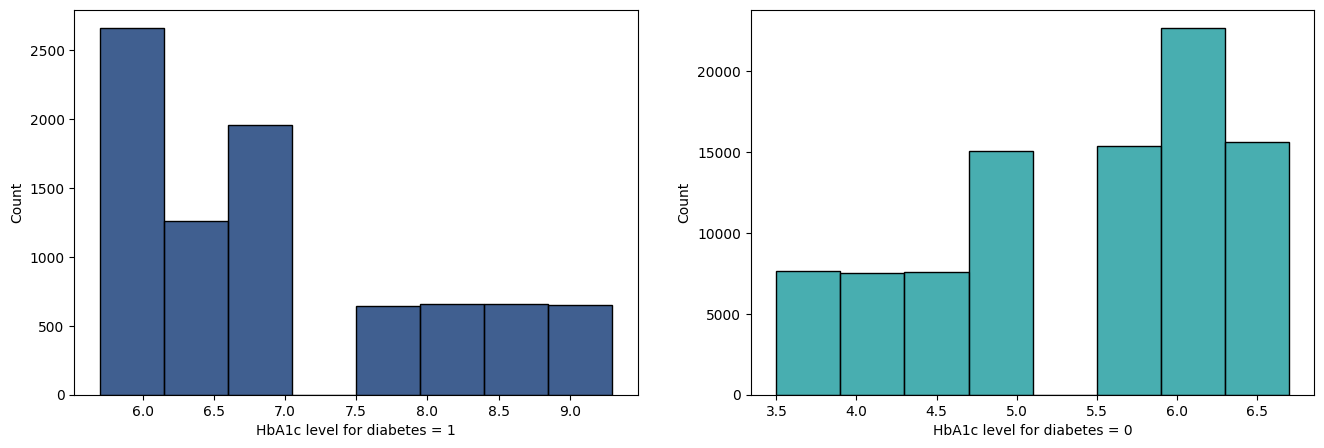

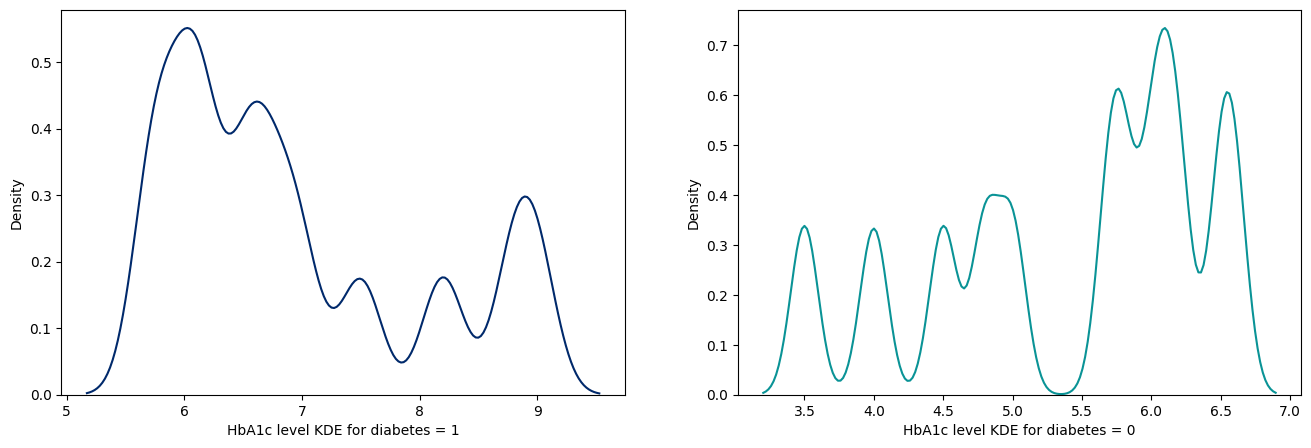

In [ ]:
diabetes = dataframe['diabetes']
hba1c_all = dataframe['HbA1c_level']
hba1c_pos = arr.array('f')
hba1c_neg = arr.array('f')

for i in range(len(diabetes)) :
  if diabetes[i] == 1 : hba1c_pos.append(hba1c_all[i])
  else : hba1c_neg.append(hba1c_all[i])

f, axes = plot.subplots(1, 2, figsize = (16, 5))
ax1 = seaborn.histplot(x = hba1c_pos, color = '#00296b', binwidth = 0.45, ax = axes[0])
ax1.set_xlabel('HbA1c level for diabetes = 1')
ax2 = seaborn.histplot(x = hba1c_neg, color = '#0a9396', binwidth = 0.4, ax = axes[1])
ax2.set_xlabel('HbA1c level for diabetes = 0')
plot.show()

f, axes = plot.subplots(1, 2, figsize = (16, 5))
ax3 = seaborn.kdeplot(x = hba1c_pos, color = '#00296b', ax = axes[0])
ax3.set_xlabel('HbA1c level KDE for diabetes = 1')
ax4 = seaborn.kdeplot(x = hba1c_neg, color = '#0a9396', ax = axes[1])
ax4.set_xlabel('HbA1c level KDE for diabetes = 0')
plot.show()

Isto možemo uraditi i za nivo glukoze u krvi.

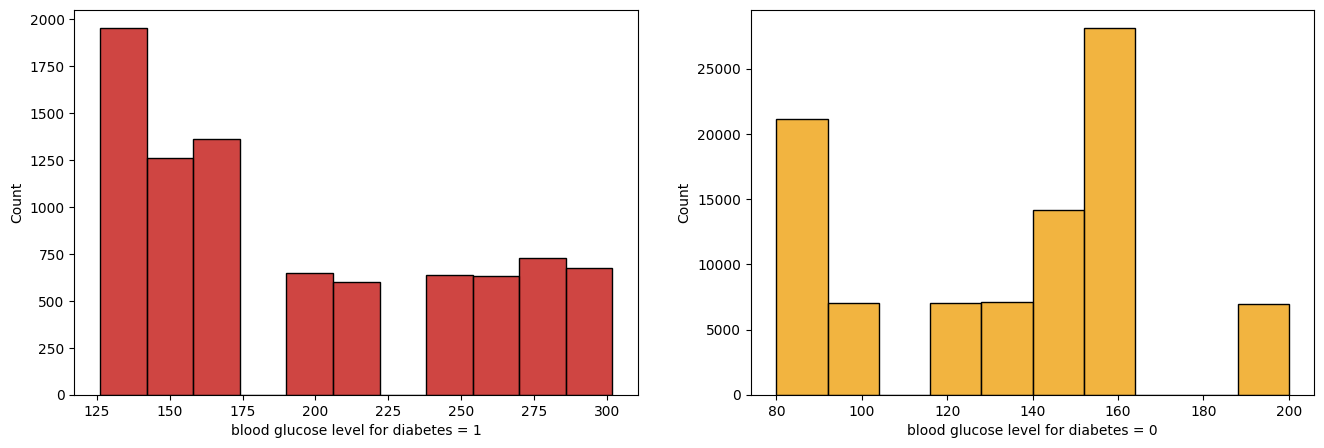

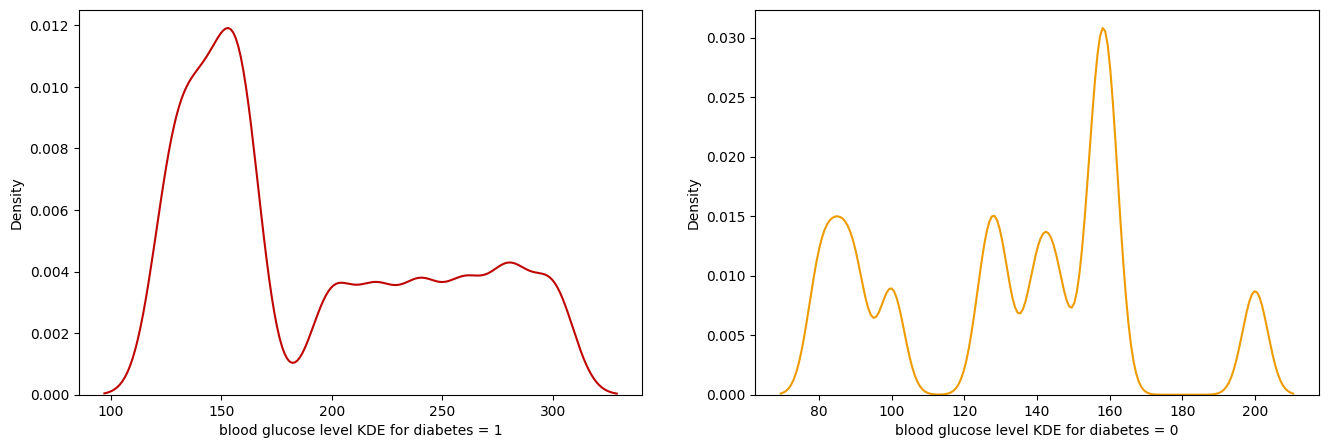

In [ ]:
glucose_all = dataframe['blood_glucose_level']
glucose_pos = arr.array('f')
glucose_neg = arr.array('f')

for i in range(len(diabetes)) :
  if diabetes[i] == 1 : glucose_pos.append(glucose_all[i])
  else : glucose_neg.append(glucose_all[i])

f, axes = plot.subplots(1, 2, figsize = (16, 5))
ax1 = seaborn.histplot(x = glucose_pos, binwidth = 16, color = '#bf0603', ax = axes[0])
ax1.set_xlabel('blood glucose level for diabetes = 1')
ax2 = seaborn.histplot(x = glucose_neg, binwidth = 12, color = '#ee9b00', ax = axes[1])
ax2.set_xlabel('blood glucose level for diabetes = 0')
plot.show()

f, axes = plot.subplots(1, 2, figsize = (16, 5))
ax3 = seaborn.kdeplot(x = glucose_pos, color = '#bf0603', ax = axes[0])
ax3.set_xlabel('blood glucose level KDE for diabetes = 1')
ax4 = seaborn.kdeplot(x = glucose_neg, color = '#ee9b00', ax = axes[1])
ax4.set_xlabel('blood glucose level KDE for diabetes = 0')
plot.show()


# Test nezavisnosti

U nastavku ćemo izvršiti testove nezavisnosti između parova kategoričnih varijabli u našem setu podataka. Prije nego što nastavimo potrebno je da napomenemo pretpostavke koje moraju biti ispunjeno prije nego što pristupimo testovima nezavisnosti.
Te pretpostavke su:


*   Obje varijable su kategoričke.
*   Zapažanja su nezavisna.
*   Broj instanci za svaku kategoriju je veći od 5.
*   Svaka instanca u kategoriji je međusobno isključiva.
*   Podaci se biraju nasumično.

S obzirom na odabrani set podataka, svaki par kategoričnih varijabli ispunjava navedene uslove, osim eventualno trećeg na koji će se naglasiti ponaosob za svaki analizirani par podataka.







## **Hipertenzija - dijabetes**

Želimo ispitati da li postoji veza između hipertenzije ispitanika i eventualnog dijabetesa koji ispitanik ima. Prije ispitivanja veze, pogledajmo neke osnovne univarijantne statistike.

In [ ]:
rp.summary_cat(dataframe[["hypertension", "diabetes"]])

/usr/local/lib/python3.10/dist-packages/researchpy/summary.py:225: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for ix, df_col in group1.iteritems():


,Variable,Outcome,Count,Percent
0,hypertension,0,92515,92.52
1,,1,7485,7.48
2,diabetes,0,91500,91.50
3,,1,8500,8.50


In [ ]:
crosstab = pandas.crosstab(dataframe["hypertension"], dataframe["diabetes"])

crosstab

diabetes,0,1
hypertension,,
0,86103,6412
1,5397,2088


Iz tabela možemo zaključiti da većina ispitanika ne boluje od hipertenzije, što treba imatu u vidu u nastavku. Također vidimo da je broj instanci za svaku kategoriju veći od 5, što je također bitno za napomenuti.

Sada pristupamo definisanju naše hipoteze i testiranju iste.
Nulta hipoteza glasi: Varijable hipertenzija i dijabetes su nezavisne. Alternativna hipoteza tvrdi da ove dvije varijable nisu nezavisne.
Postavićemo naš nivo signifikantnosti na 0.05. Sada formiramo našu statističku tabelu u svrhu računanja chi-kvadrirane statistike.

In [ ]:
crosstab, test_results, expected = rp.crosstab(dataframe["hypertension"], dataframe["diabetes"],
                                               test= "chi-square",
                                               expected_freqs= True,
                                               prop= "cell")

crosstab

diabetes              
diabetes            0     1     All
hypertension                       
0                86.1  6.41   92.52
1                 5.4  2.09    7.48
All              91.5  8.50  100.00

In [ ]:
test_results

,Chi-square test,results
0,Pearson Chi-square ( 1.0) =,3913.4037
1,p-value =,0.0000
2,Cramer's phi =,0.1978


Za v=(r-1)(c-1) = (2-1)(2-1) = 1 stepeni nezavisnosti naša maksimalna chi-kvadrirana vrijednost definisana nultom hipotezom iznosi 3.848, a vidimo da je stvarna vrijednost 3913, odakle slijedi da odbacujemo nultu hipotezu u korist alternativne, tj. ove dvije varijable su zavisne.


## **Spol - dijabetes**

Želimo ispitati da li postoji veza između spola ispitanika i eventualnog postojanja dijabetesa za ispitanika. Prije ispitivanja veze, pogledajmo neke osnovne univarijantne statistike.

In [ ]:
rp.summary_cat(dataframe[["gender", "diabetes"]])

/usr/local/lib/python3.10/dist-packages/researchpy/summary.py:225: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for ix, df_col in group1.iteritems():


,Variable,Outcome,Count,Percent
0,gender,Female,58552,58.55
1,,Male,41430,41.43
2,,Other,18,0.02
3,diabetes,0,91500,91.50
4,,1,8500,8.50


In [ ]:
crosstab = pandas.crosstab(dataframe["gender"], dataframe["diabetes"])

crosstab

diabetes,0,1
gender,,
Female,54091,4461
Male,37391,4039
Other,18,0


Očekivana frekvencija za ćeliju Other-1 iznosi 1.53, što je manje od minimalnih 5, pa ne možemo nastaviti dalje sa ispitivanjem jer nam jedna pretpostavka nije tačna. (Pokušao sam na neki način filtrirati dataset da isključim kategoriju "Other" iz spola ali nisam uspio naći odgovarajuću Python komandu, ali opet ne bi ni taj pristup bio upotpunosti precizan jer bi izbacili dio dataseta).

## **Pušenje - srčane bolesti**

Želimo ispitati da li postoji veza između historije pušenja ispitanika i eventualne srčane bolesti koje učesnika ima. Prije ispitivanja veze, pogledajmo neke osnovne univarijantne statistike.

In [ ]:
rp.summary_cat(dataframe[["heart_disease", "smoking_history"]])

/usr/local/lib/python3.10/dist-packages/researchpy/summary.py:225: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for ix, df_col in group1.iteritems():


,Variable,Outcome,Count,Percent
0,heart_disease,0,96058,96.06
1,,1,3942,3.94
2,smoking_history,No Info,35816,35.82
3,,never,35095,35.10
4,,former,9352,9.35
5,,current,9286,9.29
6,,not current,6447,6.45
7,,ever,4004,4.00


In [ ]:
crosstab = pandas.crosstab(dataframe["heart_disease"], dataframe["smoking_history"])

crosstab

smoking_history,No Info,current,ever,former,never,not current
heart_disease,,,,,,
0,34893,8877,3691,8444,33998,6155
1,923,409,313,908,1097,292


Iz tabela možemo zaključiti da većina ispitanika ne boluje od srčanih bolesti, kao i da nemamo informacije o historiji pušenja od dosta ispitanika, što treba imatu u vidu u nastavku. Također vidimo da je broj instanci za svaku kategoriju veći od 5, što je također bitno za napomenuti.

Sada pristupamo definisanju naše hipoteze i testiranju iste.
Nulta hipoteza glasi: Varijable srčane bolesti i historija pušenja su nezavisne. Alternativna hipoteza tvrdi da ove dvije varijable nisu nezavisne.
Postavićemo naš nivo signifikantnosti na 0.05. Sada formiramo našu statističku tabelu u svrhu računanja chi-kvadrirane statistike.

In [ ]:
crosstab, test_results, expected = rp.crosstab(dataframe["heart_disease"], dataframe["smoking_history"],
                                               test= "chi-square",
                                               expected_freqs= True,
                                               prop= "cell")

crosstab

smoking_history                                               
smoking_history         No Info current  ever former never not current     All
heart_disease                                                                 
0                         34.89    8.88  3.69   8.44  34.0        6.16   96.06
1                          0.92    0.41  0.31   0.91   1.1        0.29    3.94
All                       35.82    9.29  4.00   9.35  35.1        6.45  100.00

In [ ]:
test_results

,Chi-square test,results
0,Pearson Chi-square ( 5.0) =,1229.3135
1,p-value =,0.0000
2,Cramer's V =,0.1109


Za v=(r-1)(c-1) = (2-1)(6-1) = 5 stepeni nezavisnosti naša maksimalna chi-kvadrirana vrijednost definisana nultom hipotezom iznosi 11.07, a vidimo da je stvarna vrijednost 1229, odakle slijedi da odbacujemo nultu hipotezu u korist alternativne, tj. ove dvije varijable su zavisne.


# Test za normalnost

Koristit ćemo tri testa za normalnost: Q-Q plot, Kolgomorov-Smirnov test i Shapiro-Wilk test.

1) Q-Q plot (quantile-quantile plot) nam služi za grafičku analizu i usporedbu dvije distribucije vjerovatnoće. U ovom slučaju uspoređujemo distribuciju neke varijable iz našeg dataset-a i normalnu distribuciju, odnosno uspoređujemo teoretske (kvantile normalne distribucije) s kvantilima distribucije ove varijable. Što su te dvije distribucije približnije, to će tačke Q-Q plot-a biti bliže pravoj y = x.

2) Kolgomorov-Smirnov test (sa 2 uzorka) je neparametarski test koji upoređuje dvije kumulativne distribucije. Koristeći numpy.random.normal() kreiramo niz sa istim brojem opservacija kao i kolona za određenu varijablu dataset-a, te istu srednju vrijednost i standardnu devijaciju; odnosno kreiramo uzorak sa normalnom distribucijom. Bazira se na hipotezama:

H0: 2 uzorka su iz iste distribucije

H1: 2 uzorka su iz različitih distribucija.

Test zatim govori o maksimalnoj razlici (distanci) ove 2 kumulativne distribucije i računa p vrijednost. Koristi se statistika Dn = sup|Fn(x) - F(x)|. U konkretnom postupku odredimo neku kritičnu vrijednost s kojom ćemo zatim porediti Dn, odnosno postavimo granicu za p vrijednost. Na osnovu toga je potrebno donijeti odluku o (ne)odbacivanju nul-hipoteze.

3) Shapiro-Wilk test se bazira na hipotezama:

H0: distribucija uzorka nije značajno različita od normalne distribucije

H1: distribucija uzorka jeste značajno različita od normalne distribucije

Praktički funkcioniše slično kao Q-Q test, jer mjeri kako se kvantili ove raspodjele uklapaju sa kvantilima normalne raspodjele.
Ponovno se računa p vrijednost na osnovu koje se donose zaključci o eventualnom odbacivanju nul-hipoteze.

## **HbA1c level**

Na početku ćemo kreirati histogram za varijablu HbA1c_level s ciljem lakše vizualizacije njene distribucije.

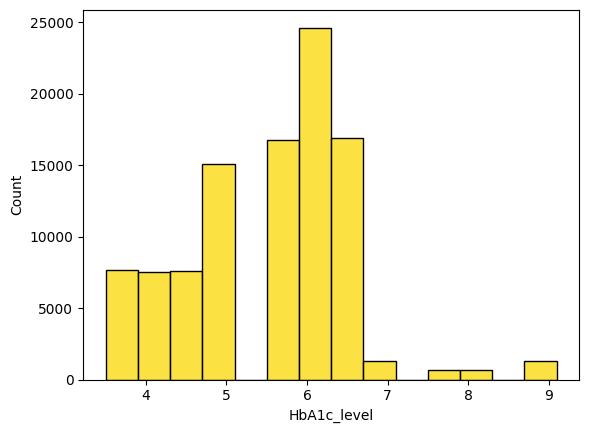

In [ ]:
seaborn.histplot(x = dataframe['HbA1c_level'], color = '#fcd703', binwidth = 0.4)
plot.show()

Na osnovu oblika histograma se već može pretpostaviti da raspodjela ove varijable neće imati prevelike sličnosti sa normalnom distribucijom. No, zaključak je svakako potrebno izvesti koristeći statističke testove.

### **Q-Q plot**

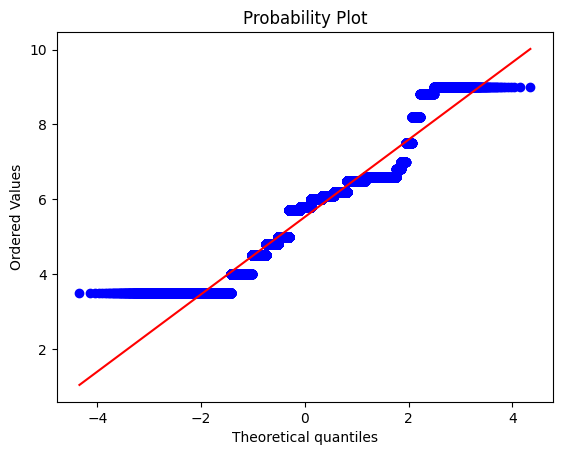

In [ ]:
stats.probplot(dataframe['HbA1c_level'], dist="norm", plot=pylab)
pylab.show()

Ovdje pravimo poređenje između distribucije varijable HbA1c_level iz našeg dataset-a i normalne distribucije, odnosno poređenje njihovih kvantila. Primjetna su prilična odstupanja položaja tačaka od prave y = x, izuzev oko sredine.

### **Kolgomorov-Smirnov test**

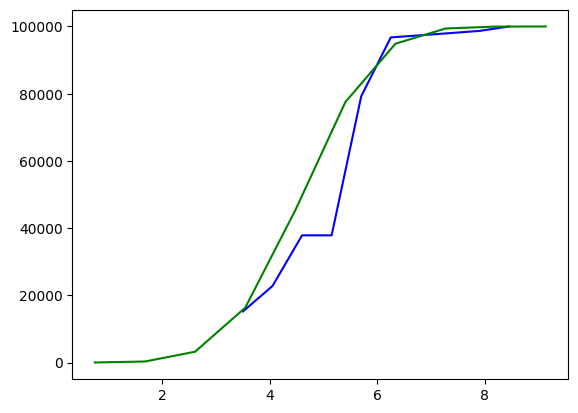

K-S statistic: 0.9997673709209645
p-value: 0.0


In [ ]:
data_norm = numpy.random.normal(numpy.mean(dataframe['HbA1c_level']), numpy.std(dataframe['HbA1c_level']), len(dataframe))
values, base = numpy.histogram(dataframe['HbA1c_level'])
values_norm, base_norm = numpy.histogram(data_norm)
cumulative = numpy.cumsum(values)
cumulative_norm = numpy.cumsum(values_norm)
plot.plot(base[:-1], cumulative, c='blue')
plot.plot(base_norm[:-1], cumulative_norm, c='green')
plot.show()

result = (kstest(dataframe['HbA1c_level'], cdf='norm'))

print(f"K-S statistic: {result[0]}")
print(f"p-value: {result[1]}")

Na grafiku zelena linija predstavlja kumulativnu distribuciju konstruisane normalne distribucije, dok je plava linija korištena za stvarnu kumulativnu distribuciju varijable HbA1c_level.

Sada je potrebno postaviti neku granicu za p vrijednost na osnovu koje donosimo odluku o eventualnom odbacivanju nul-hipoteze; recimo, postavimo zahtjev p < 5%. Može se uočiti da je dobivena p vrijednost značajno manja od 0.05.


### **Shapiro-Wilk test**

In [ ]:
hba1c_all = dataframe['HbA1c_level']
hba1c_5000 = arr.array('f')

for i in range(5000) :
  hba1c_5000.append(hba1c_all[i])

result = (shapiro(hba1c_5000))

print(f"S-W statistic: {result[0]}")
print(f"p-value: {result[1]}")

S-W statistic: 0.9302114248275757
p-value: 2.382207389352189e-43


Pošto uzimanje čitavog uzorka (koji sadrži 100000 instanci) prilikom provođenja Shapiro-Wilk testa u Python-u dovodi do upozorenja "UserWarning: p-value may not be accurate for N > 5000."; vodeći se ovim i činjenicama o ograničenosti iskoristivosti testa veličinom uzorka, bit će prikazano kako test funkcioniše na dijelu uzorka, veličine 5000.

Ukoliko postavimo zahtjev p < 5% za odbacivanje H0, može se uočiti da je proračunata p vrijednost dosta manja od 0.05.


### **Zaključak**

Konačno, iz testova dobijamo sljedeće informacije o distribuciji varijable HbA1c_level i njenoj sličnosti sa normalnom distribucijom:

1) Q-Q plot pokazuje odstupanja položaja tačaka od prave y = x.

2) Kolgomorov-Smirnov test: p vrijednost je dovoljno mala za odbacivanje H0

3) Shapiro - Wilk test (doduše, rađen na manjem uzorku): p vrijednost je dovoljno mala za odbacivanje H0

Iz navedenog zaključujemo da varijabla HbA1c_level ne prati normalnu distribuciju.

## **Nivo glukoze u krvi**

Na osnovu dosadašnjeg ispitivanja možemo primijetiti veliku sličnost varijabli 'blood_glucose_level' i 'HbA1c_level', stoga očekujemo slične zaključke i nakon sprovođenja testova normalnosti.

Prikažimo histogram za varijablu 'blood_glucose_level' kako bi bilo lakše vizualizirati njenu distribuciju.

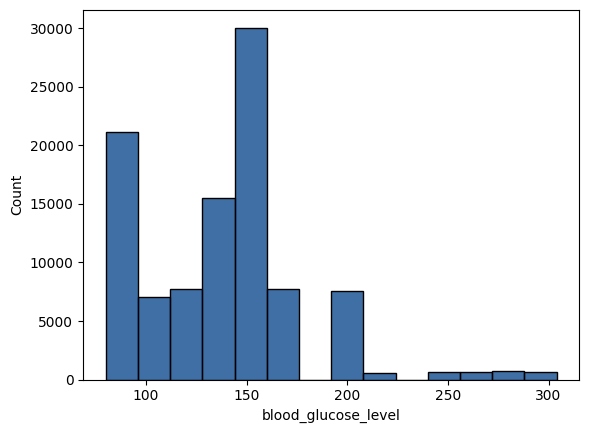

In [ ]:
seaborn.histplot(dataframe['blood_glucose_level'], color = '#003f88', binwidth = 16)
plot.show()

Iz histograma se može naslutiti da raspodjela ove varijable neće imati sličnosti sa normalnom distribucijom, a zaključak ćemo svakako izvesti koristeći statističke testove.

### **Q-Q plot**

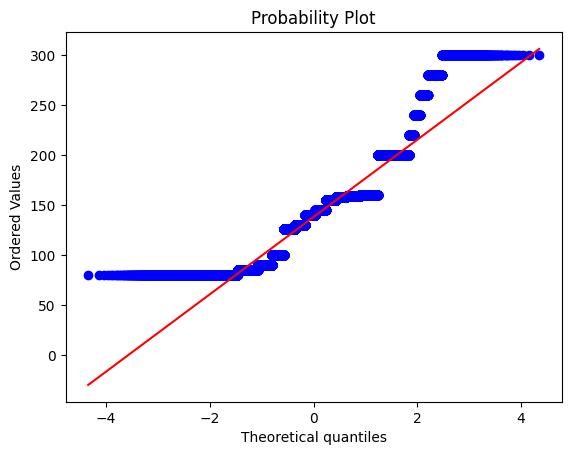

In [ ]:
stats.probplot(dataframe['blood_glucose_level'], dist = "norm", plot = pylab)
pylab.show()

U ovom slučaju uspoređujemo distribuciju varijable 'blood_glucose_level' iz našeg dataset-a s normalnom distribucijom, odnosno uspoređujemo teoretske kvantile normalne distribucije s kvantilima distribucije ove varijable.

Možemo primijetiti prilična odstupanja položaja tačaka od prave *y = x*, izuzev oko sredine.



### **Kolgomorov-Smirnov test**

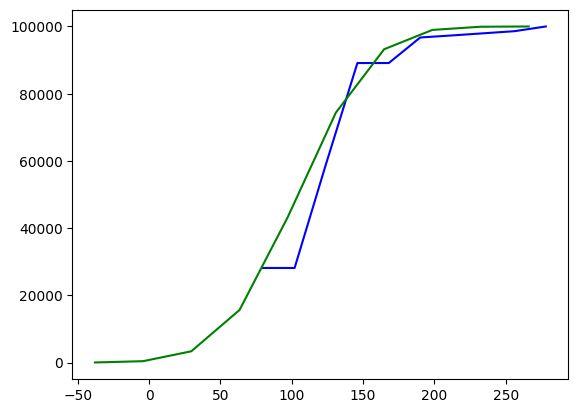

K-S statistic: 1.0
p-value: 0.0


In [ ]:
data_norm = numpy.random.normal(numpy.mean(dataframe['blood_glucose_level']), numpy.std(dataframe['blood_glucose_level']), len(dataframe))
values, base = numpy.histogram(dataframe['blood_glucose_level'])
values_norm, base_norm = numpy.histogram(data_norm)
cumulative = numpy.cumsum(values)
cumulative_norm = numpy.cumsum(values_norm)

plot.plot(base[:-1], cumulative, c = 'blue')
plot.plot(base_norm[:-1], cumulative_norm, c  ='green')
plot.show()

result = (kstest(dataframe['blood_glucose_level'], cdf  ='norm'))

print(f"K-S statistic: {result[0]}")
print(f"p-value: {result[1]}")

Zelena linija predstavlja kumulativnu distribuciju konstruisane normalne distribucije, dok plava linija predstavlja stvarnu distribuciju varijable.

Određujemo neku kritičnu vrijednost s kojom ćemo zatim porediti *Dn*, odnosno postavljamo granicu za *p* vrijednost, na osnovu koje je potrebno donijeti odluku o (ne)odbacivanju nul-hipoteze.

Recimo, postavimo zahtjev *p < 5%* za odbacivanje H0. Može se uočiti da je *p* vrijednost značajno manja od 0.05.


### **Shapiro-Wilk test**

In [ ]:
blood_glucose_all = dataframe['blood_glucose_level']
hba1c_5000 = arr.array('f')

for i in range(5000) :
  hba1c_5000.append(blood_glucose_all[i])

result = (shapiro(hba1c_5000))

print(f"S-W statistic: {result[0]}")
print(f"p-value: {result[1]}")

S-W statistic: 0.902536153793335
p-value: 0.0


// Vrijedi ista napomena, vezana za broj instanci, kao u slučaju sprovođenja Shapiro-Wilk testa za 'HbA1c_level' varijablu.

Ponovno se računa *p* vrijednost na osnovu koje se donose zaključci o eventualnom odbacivanju nul-hipoteze. Ukoliko postavimo zahtjev *p < 5%* za odbacivanje H0, može se uočiti da je proračunata *p* vrijednost značajno manja od 0.05.


### **Zaključak**

Iz testova dobijamo sljedeće informacije o distribuciji varijable 'blood_glucose_level' i njenoj sličnosti sa normalnom distribucijom:

1.   **Q-Q plot** - pokazuje odstupanja položaja tačaka od prave *y = x*
2.   **Kolgomorov-Smirnov test** - *p* vrijednost je dovoljno mala za odbacivanje H0
3.   **Shapiro-Wilk test** - *p* vrijednost je dovoljno mala za odbacivanje H0

Iz navedenog zaključujemo da varijabla 'blood_glucose_level' *ne prati normalnu distribuciju*.

## **Godine i BMI**

### Q-Q plot

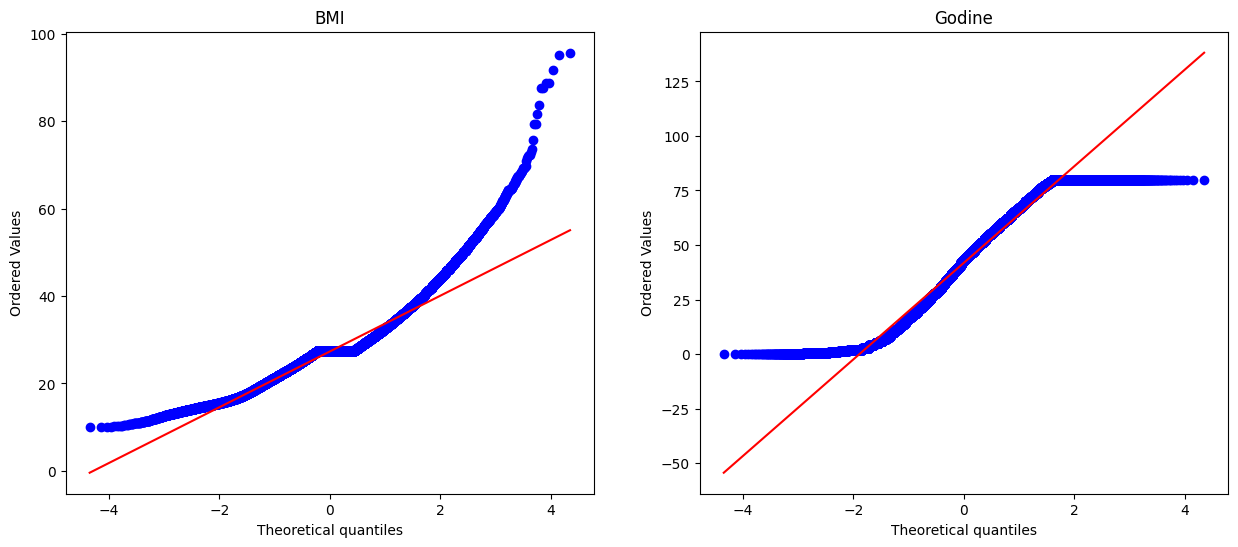

In [ ]:
import warnings
warnings.filterwarnings("ignore")
# Matplotlib baca gresku za nekakve naslove, zanemariti

fig, ax = plot.subplots(figsize=(15,6))

ax1 = plot.subplot(121)
stats.probplot(dataframe['bmi'], dist="norm", plot=pylab)
ax1.set_title("BMI")

ax2 = plot.subplot(122)
stats.probplot(dataframe['age'], dist="norm", plot=pylab)
ax2.set_title("Godine")

plot.show()

Vidimo da kod varijable BMI postoje značajna odstupanja, dok se varijabla godina uglavnom poklapa sa normalnom raspodjelom, osim pri krajevima, što smo mogli da vidimo i u prvom dijelu izlaganja.   

### Kolmogorov - Smirnov test

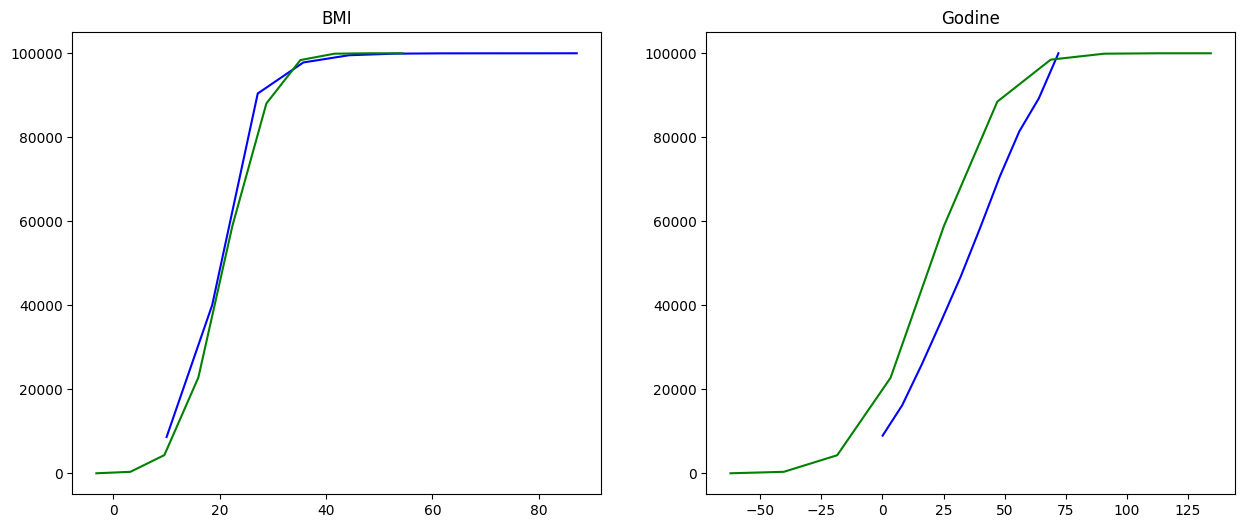


K-S statistika za BMI: 1.0
p-value za BMI: 0.000000e+00

K-S statistika za godine: 0.9657801019683699
p-value za godine: 0.000000e+00


In [ ]:
data_norm_bmi = numpy.random.normal(numpy.mean(dataframe['bmi']), numpy.std(dataframe['bmi']), len(dataframe))
data_norm_age = numpy.random.normal(numpy.mean(dataframe['age']), numpy.std(dataframe['age']), len(dataframe))

values_bmi, base_bmi = numpy.histogram(dataframe['bmi'])
values_age, base_age = numpy.histogram(dataframe['age'])
values_norm_bmi, base_norm_bmi = numpy.histogram(data_norm_bmi)
values_norm_age, base_norm_age = numpy.histogram(data_norm_age)


cumulative_bmi = numpy.cumsum(values_bmi)
cumulative_age = numpy.cumsum(values_age)
cumulative_norm_bmi = numpy.cumsum(values_norm_bmi)
cumulative_norm_age = numpy.cumsum(values_norm_age)


fig, ax = plot.subplots(figsize=(15,6))

ax1 = plot.subplot(121)
plot.plot(base_bmi[:-1], cumulative_bmi, c='blue')
plot.plot(base_norm_bmi[:-1], cumulative_norm_bmi, c='green')
ax1.set_title("BMI")


ax2 = plot.subplot(122)
plot.plot(base_age[:-1], cumulative_age, c='blue')
plot.plot(base_norm_age[:-1], cumulative_norm_age, c='green')
ax2.set_title("Godine")

plot.show()

result_bmi = (kstest(dataframe['bmi'], cdf='norm'))
result_age = (kstest(dataframe['age'], cdf='norm'))


print(f"\nK-S statistika za BMI: {result_bmi[0]}")
print("p-value za BMI: {:e}".format(result_bmi[1]))

print(f"\nK-S statistika za godine: {result_age[0]}")
print("p-value za godine: {:e}".format(result_age[1]))


Sa grafika vidimo da obje varijable odstupaju od normalne raspodjele, što potvrđuje i p-vrijednost K-S testa.

### Shapiro-Wilk test

Kao što smo rekli Shapiro-Wilk test ne daje pouzdane rezultate za naš dataset, ali ćemo radi konzistencije odraditi test na proizvoljnom uzorku od 5000 instanci.


K-S statistika za BMI mini sample-a od 5000 instaci: 0.9397145509719849
p-value za BMI: 4.474626e-41

K-S statistika za godine mini sample-a od 5000 instaci: 0.968225359916687
p-value za godine: 7.128426e-32



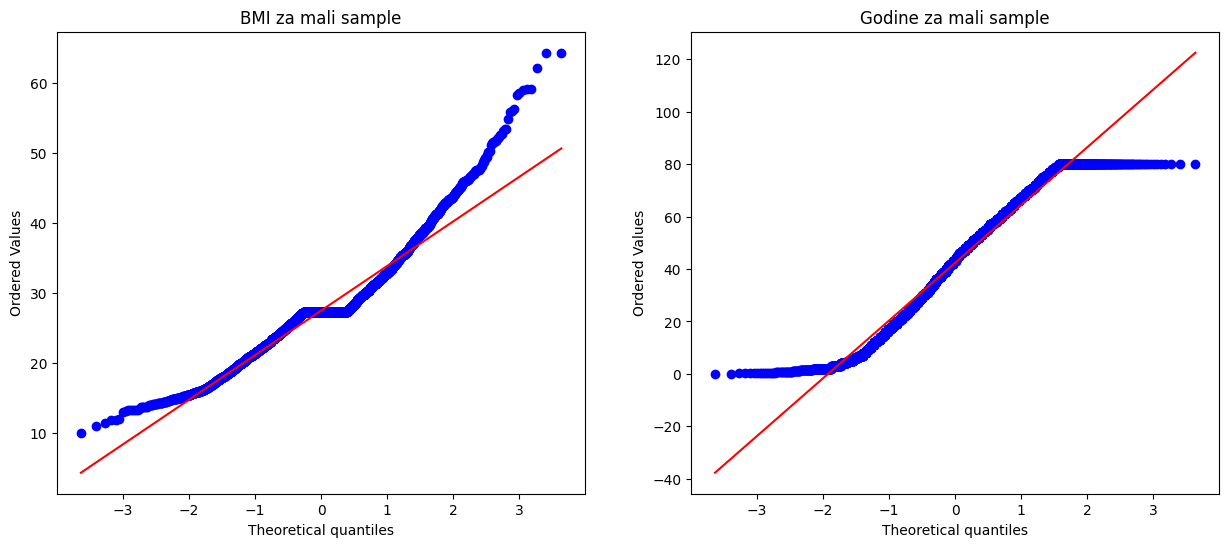

In [ ]:
mini_df = dataframe.sample(n=5000)

result_bmi = shapiro(mini_df['bmi'])
result_age = shapiro(mini_df['age'])

print(f"\nK-S statistika za BMI mini sample-a od 5000 instaci: {result_bmi[0]}")
print("p-value za BMI: {:e}".format(result_bmi[1]))

print(f"\nK-S statistika za godine mini sample-a od 5000 instaci: {result_age[0]}")
print("p-value za godine: {:e}\n".format(result_age[1]))

fig, ax = plot.subplots(figsize=(15,6))

ax1 = plot.subplot(121)
stats.probplot(mini_df['bmi'], dist="norm", plot=pylab)
ax1.set_title("BMI za mali sample")

ax2 = plot.subplot(122)
stats.probplot(mini_df['age'], dist="norm", plot=pylab)
ax2.set_title("Godine za mali sample")

plot.show()

Za ovaj mali sample smo također dobili odstupanja od normalne raspodjele.

# Estimacija intervala pouzdanosti srednje vrijednosti

## **Starost (Age)**

Za estimaciju intervala pouzdanosti možemo koristiti normalnu distribuciju preko python funkcije norm.interval() jer je uzorak znatno veći od 30.

In [ ]:
stats.norm.interval(confidence = 0.95,
              loc = numpy.mean(dataframe['age']), scale = stats.sem(dataframe['age']))

(41.74629774504374, 42.02541425495625)

Proračunom dobijamo da se za ovu srednju vrijednost, sa sigurnošću 95%, može tvrditi da se nalazi između 41.74629 i 42.02541.

## **HbA1c level**

Možemo također i estimirati interval pouzdanosti srednje vrijednosti za varijablu HbA1c_level dataset-a.

In [ ]:
stats.norm.interval(confidence = 0.95, loc = numpy.mean(dataframe['HbA1c_level']), scale = stats.sem(dataframe['HbA1c_level']))

(5.520871027562235, 5.534142972437765)

Proračunom dobijamo da se za ovu srednju vrijednost, sa sigurnošću 95%, može tvrditi da se nalazi između 5.52087 i 5.53414.

## **Nivo glukoze u krvi**

Iako smo pokazali da varijabla 'blood_glucose_level' ne prati normalnu distribuciju, s obzirom na veličinu dataset-a (100.000 instanci), možemo ustanoviti interval pouzdanosti za srednju vrijednost uzimajući u obzir distribuciju uzorkovanja statistike X̄.

In [ ]:
stats.norm.interval(confidence = 0.95, loc = numpy.mean(dataframe['blood_glucose_level']), scale = stats.sem(dataframe['blood_glucose_level']))

(137.80575299502635, 138.31036700497367)

Dakle, 95% smo sigurni da će srednja vrijednost nivoa glukoze u krvi u populaciji svih ljudi ovog dataset-a biti između 137.8057 i 138.3104.

##**BMI**

In [ ]:
stats.norm.interval(confidence=0.95, loc=numpy.mean(dataframe["bmi"]), scale=stats.sem(dataframe["bmi"]))

(27.279632646078802, 27.3619015539212)

Dobili smo interval od 27.28 do 27.36 sa pouzdanošću od 95%. Međutim ovdje treba imati na umu da je set podataka malo čudan što se tiče BMI-a kao što smo u prvom dijelu izlaganja vidjeli.

In [ ]:
pandas.set_option("display.max_rows", 4)
print(dataframe["bmi"].value_counts())

27.32    25495
23.00      103
         ...  
57.07        1
60.52        1
Name: bmi, Length: 4247, dtype: int64


Naime instance sa BMI-om od 27.32 se pojavljuju 25 000 puta što je daleko više od druge vrijednosti po frekvenciji ponavljanja. Međutim u ovom slučaju ne utiče puno na dobiveni interval kao što vidimo u primjeru ispod u kojem smo uklonili 25390 takvih instanci.

In [ ]:
df_test = dataframe
val = 27.32
br_instanci = 25390

indices = df_test[df_test['bmi'] == val].index

if len(indices) > br_instanci:
    indices_to_remove = indices[:br_instanci]
    df_test = df_test.drop(indices_to_remove)

print(df_test["bmi"].value_counts())
stats.norm.interval(confidence=0.95, loc=numpy.mean(df_test["bmi"]), scale=stats.sem(df_test["bmi"]))

27.32    105
23.00    103
        ... 
12.13      1
60.52      1
Name: bmi, Length: 4247, dtype: int64


(27.265895424447873, 27.376160868274287)

# Estimacija intervala pouzdanosti proporcije

## **Historija pušenja**

Za estimaciju intervala pouzdanosti proporcije koristimo proportion_confint() funkciju. S obzirom da historija pušenja ima pet opcija, nije klasična binomialna varijabla, tako da ćemo ispitati intervale pouzdanosti za svaku kategoriju ponaosob.

In [ ]:
proportion_confint(count=len(dataframe[dataframe['smoking_history']=='No Info']), nobs=len(dataframe['smoking_history']))

(0.3551883338224818, 0.36113166617751813)

In [ ]:
proportion_confint(count=len(dataframe[dataframe['smoking_history']=='never']), nobs=len(dataframe['smoking_history']))

(0.3479919208419056, 0.35390807915809436)

In [ ]:
proportion_confint(count=len(dataframe[dataframe['smoking_history']=='former']), nobs=len(dataframe['smoking_history']))

(0.09171540623146503, 0.09532459376853498)

In [ ]:
proportion_confint(count=len(dataframe[dataframe['smoking_history']=='current']), nobs=len(dataframe['smoking_history']))

(0.09106113078561956, 0.09465886921438044)

In [ ]:
proportion_confint(count=len(dataframe[dataframe['smoking_history']=='not current']), nobs=len(dataframe['smoking_history']))

(0.06294785584092806, 0.06599214415907194)

Proračunom dobijamo da se sa sigurnošću 95% može tvrditi da se omjer učesnika koji nisu dali informacije o svojoj historiji pušenja, onih koji nikada nisu pušili, bivših pušača, trenutnih pušača i onih koji nisu trenutni pušači, u populaciji nalazi u intervalima:
*   (0.3551883338224818, 0.36113166617751813)
*   (0.3479919208419056, 0.35390807915809436)
*   (0.09171540623146503, 0.09532459376853498)
*   (0.09106113078561956, 0.09465886921438044)
*   (0.06294785584092806, 0.06599214415907194)

respektivno.

## **Spol**

Za estimaciju intervala pouzdanosti proporcije koristimo proportion_confint() funkciju. S obzirom da spol ima tri opcije, nije klasična binomialna varijabla, tako da ćemo ispitati intervale pouzdanosti za svaku kategoriju ponaosob.

In [ ]:
proportion_confint(count=len(dataframe[dataframe['gender']=='Female']), nobs=len(dataframe['gender']))

(0.582466691071143, 0.5885733089288571)

In [ ]:
proportion_confint(count=len(dataframe[dataframe['gender']=='Male']), nobs=len(dataframe['gender']))

(0.4112468849525779, 0.4173531150474221)

In [ ]:
proportion_confint(count=len(dataframe[dataframe['gender']=='Other']), nobs=len(dataframe['gender']))

(9.685325475647575e-05, 0.00026314674524352424)

Proračunom dobijamo da se sa sigurnošću 95% može tvrditi da se omjer žena, muškaraca i ostalih u populaciji nalazi u intervalima [0.58246, 0.58857], [0.41124, 0.41735], [9.68e-05, 0.00026] respektivno.

## **Hipertenzija**

In [ ]:
print("Sa sigurnošću od 95% možemo tvrditi: ")
print("Da se proporcija osoba sa hipertenzijom nalazi u intervalu: {}".format(proportion_confint(count=len(dataframe[dataframe["hypertension"] == 1]), nobs=len(dataframe))))
print("Da se proporcija osoba bez hipertenzije nalazi u intervalu: {}".format(proportion_confint(count=len(dataframe[dataframe["hypertension"] == 0]), nobs=len(dataframe))))

Sa sigurnošću od 95% možemo tvrditi: 
Da se proporcija osoba sa hipertenzijom nalazi u intervalu: (0.07321901461302317, 0.07648098538697683)
Da se proporcija osoba bez hipertenzije nalazi u intervalu: (0.9235190146130232, 0.9267809853869768)


## **Srčana bolest**

In [ ]:
print("Sa sigurnošću od 95% možemo tvrditi: ")
print("Da se proporcija osoba sa srčanom bolešću nalazi u intervalu: {}".format(proportion_confint(count=len(dataframe[dataframe["heart_disease"] == 1]), nobs=len(dataframe))))
print("Da se proporcija osoba bez srčane bolesti nalazi u intervalu: {}".format(proportion_confint(count=len(dataframe[dataframe["heart_disease"] == 0]), nobs=len(dataframe))))

Sa sigurnošću od 95% možemo tvrditi: 
Da se proporcija osoba sa srčanom bolešću nalazi u intervalu: (0.038213928177838544, 0.04062607182216145)
Da se proporcija osoba bez srčane bolesti nalazi u intervalu: (0.9593739281778385, 0.9617860718221615)


## **Dijabetes**

Budući da je varijabla diabetes binomna sa mogućim vrijednostima 0 (osoba nema dijabetes) i 1 (osoba ima dijabetes), možemo jednostavno estimirati proporcije ove 2 kategorije u čitavoj populaciji.

In [ ]:
proportion_confint(count=len(dataframe[dataframe['diabetes']==0]), nobs=len(dataframe['diabetes']))

(0.9132715051062283, 0.9167284948937717)

In [ ]:
proportion_confint(count=len(dataframe[dataframe['diabetes']==1]), nobs=len(dataframe['diabetes']))

(0.0832715051062283, 0.08672849489377171)

Računski dobijamo da se sa sigurnošću 95% može tvrditi da je proporcija osoba koje nemaju dijabetes u populaciji na intervalu (0.9132715, 0.9167285), a osoba koje imaju dijabetes na intervalu (0.0832715, 0.0867285). Generalno se kroz analizu može primjetiti da su u dataset-u dosta više zastupljene osobe koje nemaju dijabetes u odnosu na one koje imaju.

# Ispitivanje statističkih hipoteza

## **Srednja vrijednost starosti dijabetičara**

Zanima nas srednja vrijednost godina dijabetičara unutar populacije.

Intuitivno, nultu hipotezu možemo definisati na sljedeći način: "Srednja vrijednost godina dijabetičara je jednaka srednjoj vrijednosti godina populacije."
Alternativna hipoteza glasi: "Srednja vrijednost godina dijabetičara nije jednaka srednjoj vrijednosti godina populacije."

Definišimo nivo signifikantnosti od 0.05.

Sada trebamo proračunati kritični region. (Digresija: S obzirom na nepraktičnost računanja z-vrijednosti u Pythonu koristili smo srednju vrijednost godina dijabetičara.)

In [ ]:
stats.norm.interval(confidence = 0.95,
              loc = numpy.mean(dataframe['age']), scale = stats.sem(dataframe['age']))

(41.74629774504374, 42.02541425495625)

Proračunom dobijamo da kritični region uključuje uniju intervala  x̄ < 41.74629 i x̄ > 42.02541.

Sada računamo srednju vrijednost godina dijabetičara:

In [ ]:
mean = numpy.mean(dataframe[dataframe['diabetes'] == 1]['age']);
mean

60.946588235294115

Vidimo da srednja vrijednost godina dijabetičara pripada kritičnom regionu, pa odbacujemo nultu hipotezu u korist alternativne hipoteze: "Srednja vrijednost godina dijabetičara nije jednaka srednjoj vrijednosti godina populacije".

## **BMI osoba sa dijabetesom**

H0: Osobe sa dijabetesom imaju isti BMI kao osobe bez dijabetesa

H1: Osobe sa dijabetesom nemaju isti BMI kao osobe bez dijabetesa

In [ ]:
donja, gornja = stats.norm.interval(confidence=0.95, loc=numpy.mean(dataframe[dataframe["diabetes"] == 0]["bmi"]), scale=stats.sem(dataframe[dataframe["diabetes"] == 0]["bmi"]))
mean = dataframe[dataframe["diabetes"] == 1]["bmi"].mean()

if (mean < donja or mean > gornja):
  print(f"Odbacujemo H0, prihvatamo H1. Kritični region je Xsr < {donja} ili {gornja} < Xsr, a Xsr = {mean}")
else:
  print("Nemamo dovoljno podataka da odbacimo H0")

Odbacujemo H0, prihvatamo H1. Kritični region je Xsr < 26.845867390953046 ili 26.928459603582475 < Xsr, a Xsr = 31.988382352941176


## **Kardiovaskularna oboljenja i nivo HbA1c i šećera u krvi**

Budući da su sve varijable u dataset-u prilično povezane i u konačnici utječu na glavnu varijablu - prisustvo dijabetesa, interesantno bi bilo ispitati vezu između kardiovaskularnih oboljenja (u našem slučaju definisanih preko varijabli "hypertension" i "heart_disease") i nivoa HbA1c i šećera u krvi ("HbA1c_level" i "blood_glucose_level").

Stoga ćemo podijeliti dataset na 2 dijela - osobe koji imaju hipertenziju ili srčane bolesti (tj. za koje je vrijednost barem jedne od te dvije varijable 1) i ostale (vrijednost obje varijable 0).

In [ ]:
hypertension = dataframe['hypertension']
heart_dis = dataframe['heart_disease']
hba1c_all = dataframe['HbA1c_level']
glucose_all = dataframe['blood_glucose_level']
hyp_or_hd_pos = arr.array('f')
hyp_or_hd_neg = arr.array('f')
hyp_or_hd_pos_gl = arr.array('f')
hyp_or_hd_neg_gl = arr.array('f')

for i in range(len(hypertension)) :
  if hypertension[i] == 1 or heart_dis[i] == 1 :
    hyp_or_hd_pos.append(hba1c_all[i])
    hyp_or_hd_pos_gl.append(glucose_all[i])
  else :
    hyp_or_hd_neg.append(hba1c_all[i])
    hyp_or_hd_neg_gl.append(glucose_all[i])

Hipoteze ispitujemo koristeći t-test za 2 uzorka, uz pomoć funkcije ttest_ind().

Prvo ćemo formirati hipoteze za HbA1c level za ove dvije skupine.

H0: Srednje vrijednosti HbA1c levela osoba koje imaju kardiovaskularna oboljenja i onih koje nemaju su jednake.

H1: Srednje vrijednosti HbA1c levela osoba koje imaju kardiovaskularna oboljenja i onih koje nemaju su različite.

In [ ]:
stats.ttest_ind(a = hyp_or_hd_pos, b = hyp_or_hd_neg)

Ttest_indResult(statistic=31.29498494481256, pvalue=5.943036424311642e-214)

Pošto smo kao rezultat dobili dovoljno malu p-vrijednost, odbacujemo nultu u korist alternativne hipoteze, odnosno zaključujemo da ove dvije srednje vrijednosti zaista jesu različite.

Sličnim principom formiramo i ispitujemo hipoteze za nivo šećera u krvi.

H0: Srednje vrijednosti nivoa šećera u krvi osoba koje imaju kardiovaskularna oboljenja i onih koje nemaju su jednake.

H1: Srednje vrijednosti nivoa šećera u krvi osoba koje imaju kardiovaskularna oboljenja i onih koje nemaju su različite.

In [ ]:
stats.ttest_ind(a = hyp_or_hd_pos_gl, b = hyp_or_hd_neg_gl)

Ttest_indResult(statistic=33.247037949448305, pvalue=4.699206711690328e-241)

Ponovno na osnovu dovoljno male p-vrijednosti odbacujemo nultu u korist alternativne hipoteze, tj. zaključujemo da su ove dvije srednje vrijednosti različite.

## **Pušenje i povišen nivo šećera u krvi**

Inzulin pomaže da šećer prodre u ćelije, međutim, promjene koje nikotin izaziva u ćelijama utiču na to da one više ne reaguju na inzulin, što dovodi do povećanog nivoa šećera u krvi.

Formirajmo stoga sljedeće hipoteze:

*   H0: Pušači **imaju jednak** nivo šećera u krvi kao i nepušači
*   H1: Pušači **nemaju jednak** nivo šećera u krvi kao i nepušači

In [ ]:
smoking = dataframe['smoking_history']
glucose = dataframe['blood_glucose_level']

smokers = arr.array('f')
non_smokers = arr.array('f')

for i in range(len(smoking)) :
  if smoking[i] == "current" :
    smokers.append(glucose[i])
  elif smoking[i] == "never" :
    non_smokers.append(glucose[i])

stats.ttest_ind(smokers, non_smokers)

Ttest_indResult(statistic=1.8478104295482995, pvalue=0.06463642135695209)

Na osnovu male *p-vrijednosti* odbacujemo nultu u korist alternativne hipoteze.

Možemo zaključiti da nivo šećera u krvi zaista jeste različit kod pušača i nepušača.

# Linearna regresija

**Linearna regresija** je vrsta statističke analize koja se koristi za predviđanje odnosa između dvije varijable. Pretpostavlja linearnu vezu između nezavisne i zavisne varijable, te ima za cilj da pronađe najprikladniju vezu koja opisuje odnos. Veza se određuje minimiziranjem sume kvadrata razlika između predviđenih i stvarnih vrijednosti.

*Kvadratno R* je broj koji objašnjava količinu varijacije koja je "uhvaćena" razvijenim modelom i uvijek ima vrijednost između 0 i 1. Što je veća vrijednost *kvadratnog R*, to se model bolje uklapa u podatke.

Na osnovu izloženog, u nastavku ispitajmo za koje varijable ima smisla, ako uopće, postaviti model linearne regresije.

In [ ]:
def find_best_linear_regression(data):
    columns = data.columns.tolist()
    best_regressions = []

    for column_combo in combinations(columns, 2):
        x = data[column_combo[0]]
        y = data[column_combo[1]]

        if not numpy.issubdtype(x.dtype, numpy.number) or not numpy.issubdtype(y.dtype, numpy.number): continue

        x = x.values.reshape(-1, 1)
        y = y.values

        regression_model = LinearRegression()
        regression_model.fit(x, y)
        y_pred = regression_model.predict(x)

        ss_total = ((y - y.mean())**2).sum()
        ss_residual = ((y - y_pred)**2).sum()
        r2_score = 1 - (ss_residual / ss_total)

        best_regressions.append((column_combo[0], column_combo[1], r2_score))

    best_regressions.sort(key = lambda x : x[2], reverse = True)
    return best_regressions


best_regressions = find_best_linear_regression(dataframe)

print("Najbolje linearne regresije:\n")
for regression in best_regressions:
    print(f"'{regression[0]}' i '{regression[1]}' => {round(regression[2], 4)}")

Najbolje linearne regresije:

'blood_glucose_level' i 'diabetes' => 0.176
'HbA1c_level' i 'diabetes' => 0.1605
'age' i 'bmi' => 0.1138
'age' i 'diabetes' => 0.0666
'age' i 'hypertension' => 0.0631
'age' i 'heart_disease' => 0.0545
'bmi' i 'diabetes' => 0.0459
'hypertension' i 'diabetes' => 0.0391
'heart_disease' i 'diabetes' => 0.0295
'HbA1c_level' i 'blood_glucose_level' => 0.0278
'hypertension' i 'bmi' => 0.0218
'hypertension' i 'heart_disease' => 0.0147
'age' i 'blood_glucose_level' => 0.0122
'age' i 'HbA1c_level' => 0.0103
'bmi' i 'blood_glucose_level' => 0.0083
'hypertension' i 'blood_glucose_level' => 0.0071
'bmi' i 'HbA1c_level' => 0.0069
'hypertension' i 'HbA1c_level' => 0.0066
'heart_disease' i 'blood_glucose_level' => 0.0049
'heart_disease' i 'HbA1c_level' => 0.0046
'heart_disease' i 'bmi' => 0.0037


Generalno, da bismo saznali šta se smatra "dobrom" vrijednošću *kvadratnog R*, potrebno je istražiti koje vrijednosti su općenito prihvaćene u posmatranom polju studija. Prosječna vrijednost *kvadratnog R* u medicinskim istraživanjima je 0.499, što znači da prosječni model linearne regresije objašnjava 49.9% varijanse ishoda.

Konkretno u našem slučaju, s obzirom na male vrijednosti *kvadratnog R*, regresijski model **ne možemo smatrati pouzdanim**.